In [1]:
%matplotlib inline

# SYDE 522 Assignment 1
## Perceptrons and Regression

### Due: Monday Sept 25 at 11:59pm

As with all the assignments in this course, this assignment is structured as a Jupyter Notebook and uses Python.  If you do not have Python and Jupyter Notebook installed, the easiest method is to download and install Anaconda https://www.anaconda.com/download.  There is a quick tutorial for running Jupyter Notebook from within Anacoda at https://docs.anaconda.com/free/anaconda/getting-started/hello-world/#python-exercise-jupyter under "Run Python in a Jupyter Notebook"

Implement your assignment directly in the Jupyter notebook and submit your resulting Jupyter Notebook file using Learn.

While you are encouraged to talk about the assignment with your classmates, you must write and submit your own assignment.  Directly copying someone else's assignment and changing a few small things here and there does not count as writing your own assignment.

Make sure to label the axes on all of your graphs.


### Question 1: Implementing a Perceptron

The following code generates the same data that was used to demonstrate the Perceptron in class:

In [4]:
import sklearn.datasets
data_x, data_y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                             cluster_std=[0.3, 1.5], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)

This produces two arrays, `data_x` which contains the input data (200 rows, each of which has 2 values $x_1$ and $x_2$), and `data_y` which contains the desired output data (either a 1 or a 0).

Implement a Perceptron to learn a classifier on this data.  It should learn three values: $\omega_1$, $\omega_2$, and $\theta$ (of course you can use whatever variable names you like to encode them).  You can treat $\theta$ separately, or you can consider it an extra weight variable $\omega_0$ and have an extra input that is always 1.  Implement this Perceptron yourself, rather than using the `sklearn.linear_model.Perceptron` implementation that we will use in Question 2.

Initialize the weights to $\omega_1=1; \omega_2=-1; \theta=0$.  

**a) [1 mark]** Before doing any training, plot the data as a scatterplot and colour the dots such that the data points for which the model outputs a 1 are blue and the ones for which the model outputs a 0 are red.  This can be done with the following code, if `y` is the list of outputs from your model.  Compute how accurate the model is (i.e. what percentage of the time the model outputs the correct value) and report that number.

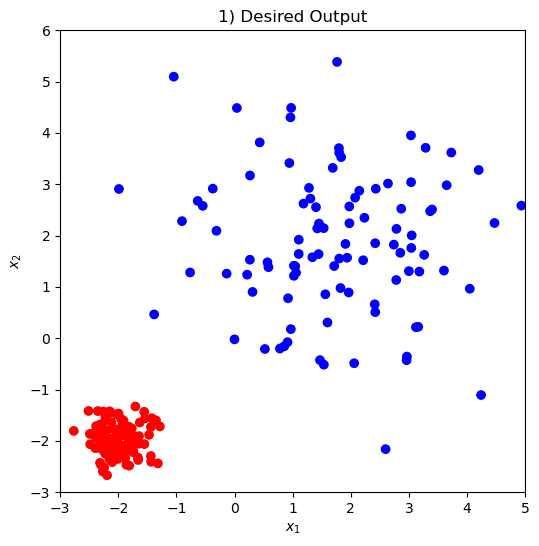

A) 


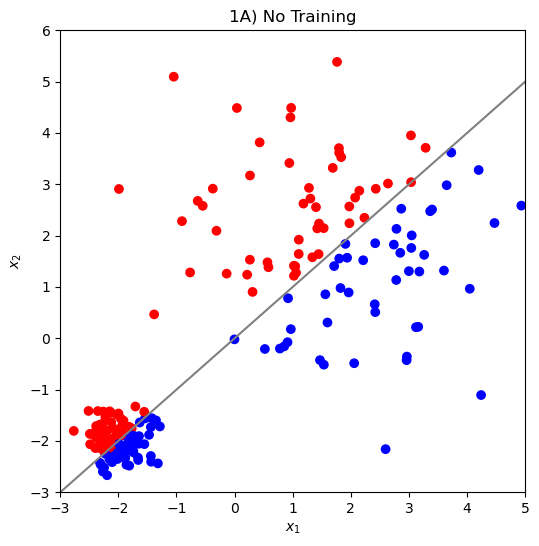

Weights:  [1, -1, 0]
Accuracy = 51.5 %

B) 
Weights:  [0.9685061  0.72623959 0.5       ]
Accuracy:  99.5 %



C:\Users\Keena\AppData\Local\Temp\ipykernel_6796\3102503259.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if weights != []:


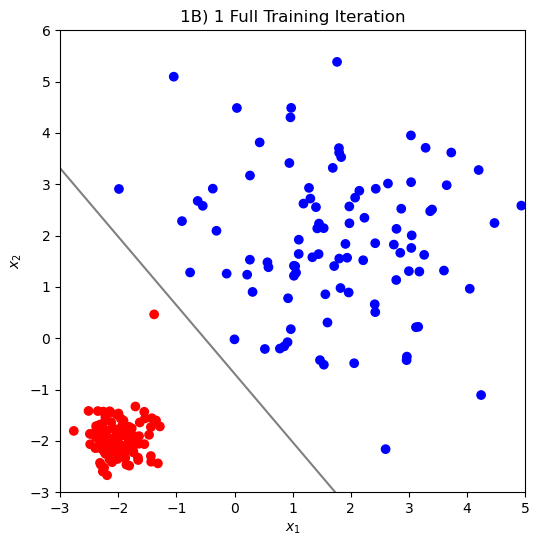

C) 
99.5
99.5
100.0
Repetitions:  3
Weights:  [0.69183683 0.81948754 0.7       ]
Accuracy:  100.0 %



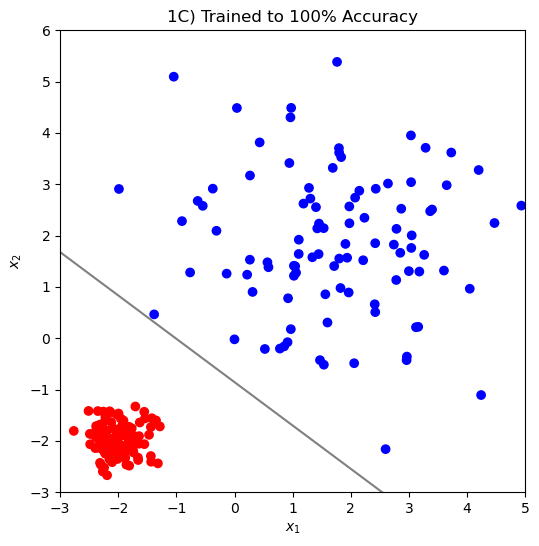

D) 
Learning Rate:  1
Repetitions:  3
Weights:  [2.7593739  0.94041393 5.        ]
Accuracy:  100.0 %



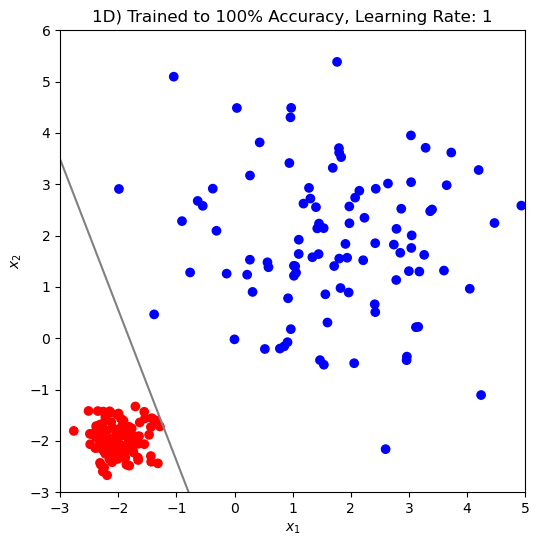

Learning Rate:  0.01
Repetitions:  22
Weights:  [0.58570791 0.43140166 0.62      ]
Accuracy:  100.0 %



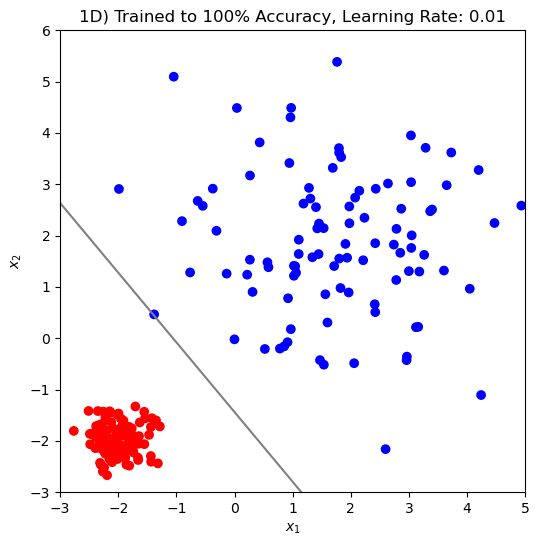

Learning Rate:  100
Repetitions:  3
Weights:  [330.7242151  143.64844792 500.        ]
Accuracy:  100.0 %



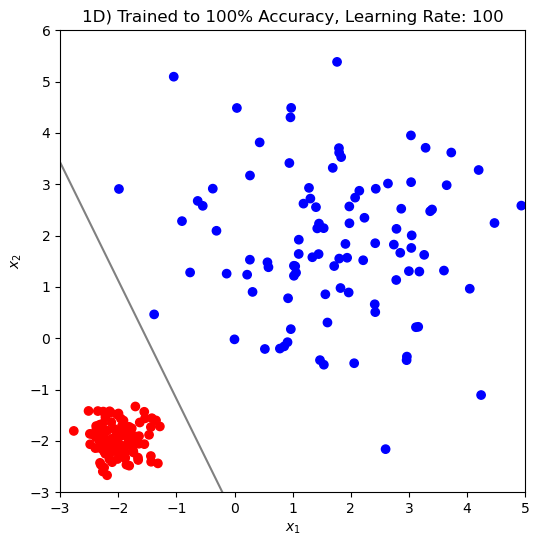

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 14 11:18:58 2023


#Student ID: 20838709
"""

import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

def compare_results(desired_output, actual_results):
    accurate_classifications = 0

    for index in range(len(desired_output)):
        if desired_output[index] == actual_results[index]:
            accurate_classifications += 1
            
    pct_accuracy = 100 * accurate_classifications / len(desired_output)
    
    return pct_accuracy
    
def plot_results(input_data, classifications, weights, title):
    plt.figure(figsize=(6,6))
    plt.scatter(input_data[:,0], input_data[:,1], c=np.where(classifications, class_1_clr, class_0_clr))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    if weights != []:
        boundary_x  = np.linspace(-3, 5, 100)
        boundary_y = -(weights[0] * boundary_x + weights[2]) / weights[1]

        plt.plot(boundary_x, boundary_y, label='Line', color='grey')
    
    plt.title(title)
    plt.xlim(-3, 5)
    plt.ylim(-3, 6)
    plt.show()
    
def classify_points(points, weights):
    classifications = []
    
    for idx, point in enumerate(points):
        
        score = np.dot(weights, point)
        classification = class_0 if score < 0 else class_1
        classifications.append(classification)
        
    return classifications
    
def full_learning_iteration(input_data, desired_output, weights, learning_rate):
    
    for idx, point in enumerate(input_data):
        
        score = np.dot(weights, point)
        classification = class_0 if score < 0 else class_1
        
        if classification != desired_output[idx]:
            delta_w = learning_rate * point * (desired_output[idx] - classification)
        
            weights += delta_w   
            
    return weights
    

red_class_num = 0
blue_class_num = 1

class_0 = 0
class_0_clr = 'red'

class_1 = 1
class_1_clr = 'blue'

input_data, desired_output = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                             cluster_std=[0.3, 1.5], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)

theta_column = np.ones((input_data.shape[0], 1), dtype=int)
input_data = np.hstack((input_data, theta_column))


plot_results(input_data, desired_output, [], "1) Desired Output")


weights= [1, -1, 0]
learning_rate = 0.1

# A) [DONE]
print("A) ")

model_output_no_training = classify_points(input_data, weights)
    
plot_results(input_data, model_output_no_training, weights, "1A) No Training")

pct_accuracy = compare_results(desired_output,  model_output_no_training)
    
print("Weights: ", weights)
print("Accuracy =", pct_accuracy, "%")
print()

# B) [DONE]
print("B) ")


weights = full_learning_iteration(input_data, desired_output, weights, learning_rate)
    
model_output_trained = classify_points(input_data, weights)

pct_accuracy = compare_results(desired_output, model_output_trained)
print("Weights: ", weights)
print("Accuracy: ", pct_accuracy, "%")
print()
plot_results(input_data, model_output_trained, weights, "1B) 1 Full Training Iteration")

# C) [DONE]
print("C) ")

weights = [1, -1, 0]
pct_accuracy = 0
repetitions = 0

while pct_accuracy < 100:
    
    weights = full_learning_iteration(input_data, desired_output, weights, learning_rate)
            
    model_output_trained = classify_points(input_data, weights)

    pct_accuracy = compare_results(desired_output, model_output_trained)
    print(pct_accuracy)
    
    repetitions += 1

print("Repetitions: ", repetitions)
print("Weights: ", weights)
print("Accuracy: ", pct_accuracy, "%")
print()
plot_results(input_data, model_output_trained, weights, "1C) Trained to 100% Accuracy")

# D) [DONE]
print("D) ")

learning_rates = [1, 0.01, 100]

for learning_rate in learning_rates:
    repetitions = 0
    weights = [1, -1, 0]
    pct_accuracy = 0
    
    while pct_accuracy < 100:
        
        weights = full_learning_iteration(input_data, desired_output, weights, learning_rate)
                
        model_output_trained = classify_points(input_data, weights)
    
        pct_accuracy = compare_results(desired_output, model_output_trained)
                
        repetitions += 1
    
    print("Learning Rate: ", learning_rate)
    print("Repetitions: ", repetitions)
    print("Weights: ", weights)
    print("Accuracy: ", pct_accuracy, "%")
    print()
    title = "1D) Trained to 100% Accuracy, Learning Rate: " + str(learning_rate)  
    plot_results(input_data, model_output_trained, weights, title)

**b) [1 mark]** Train the model by going through each of the 200 elements in the data set in order once.  For each input, check if the output is correct.  If it is not correct, apply the Perceptron Learning Rule.   Use a learning rate of 0.1.

Now produce the same plot as in part a), but with your trained weights.  How accurate is the model now?  Report the $\omega$ and $\theta$ values.

**c) [1 mark]** Repeat the training in part b) enough times that the model is perfect (in that it correctly classifies all the inputs).  How many repetitions does this take?  Produce the same plots as in part a) and b), but with your new weights.  Report the $\omega$ and $\theta$ values.

**d) [1 mark]** Create a new Perceptron identical to the above one, but with a learning rate of 1.0.  Train this model until it reaches 100% accuracy.  How many repetitions does this take?  Produce the same plot again, but with your new weights.  Report the $\omega$ and $\theta$ values.

Now do the same thing with a learning rate of 0.01, and then again with a learning rate of 100.

### Question 2:

We will now try a more complex dataset, and use a pre-written implementation of the Perceptron.  The `sklearn` Python library https://scikit-learn.org/ has a large collection of machine learning algorithms, and comes with a variety of datasets.  It comes pre-installed with Anaconda or can be installed with `pip install scikit-learn`.

The dataset we will use is the UCI ML hand-written digits dataset https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

It is available with the following command:

In [15]:
import sklearn.datasets
digits = sklearn.datasets.load_digits()

The inputs are 64 values, representing an 8x8 input image that is a low-resolution handwritten digit.  You can access this data as `digits.data`.  The correct label (i.e. the desired output) for each digit is accessed with `digits.target`.  Here are the first four input-output pairs:

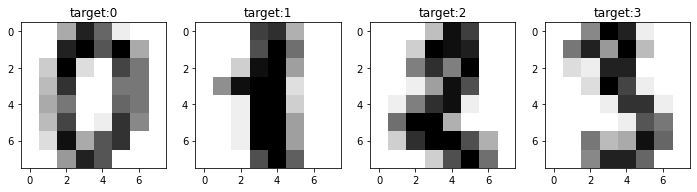

In [19]:
plt.figure(figsize=(12,3))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap='gray_r')
    plt.title(f'target:{digits.target[i]}')
plt.show()

You can create a Perceptron using the following command, where `eta0` is the learning rate:

In [ ]:
import sklearn.linear_model
perceptron = sklearn.linear_model.Perceptron(eta0=1.0)

If you have an input data `X` and target output data `Y`, you can train the perceptron as follows:

In [ ]:
perceptron.fit(X, Y)

Once the Perceptron has been trained, you can see what outputs it actually generates given input `X` as follows:

In [ ]:
perceptron.predict(X)

In addition, `sklearn` provides a useful tool for separating your data into training and test data.

A)
Percent Accuracy:  100.0 %

B)
Learning Rate:  0.0 . Accuracy:  92.5
Learning Rate:  0.0 . Accuracy:  92.5
Learning Rate:  0.0 . Accuracy:  92.5
Learning Rate:  0.0 . Accuracy:  92.5
Learning Rate:  0.0 . Accuracy:  92.5
Learning Rate:  0.0 . Accuracy:  92.5
Learning Rate:  0.0 . Accuracy:  92.78
Learning Rate:  0.0 . Accuracy:  92.78
Learning Rate:  0.0 . Accuracy:  92.78
Learning Rate:  0.0 . Accuracy:  92.5
Learning Rate:  0.0 . Accuracy:  92.5
Learning Rate:  0.0 . Accuracy:  92.78
Learning Rate:  0.0 . Accuracy:  92.5
Learning Rate:  0.0 . Accuracy:  93.33
Learning Rate:  0.0 . Accuracy:  93.33
Learning Rate:  0.0 . Accuracy:  95.28
Learning Rate:  0.0 . Accuracy:  95.0
Learning Rate:  0.0 . Accuracy:  95.56
Learning Rate:  0.0 . Accuracy:  95.56
Learning Rate:  0.0 . Accuracy:  94.44
Learning Rate:  0.0 . Accuracy:  95.28
Learning Rate:  0.0 . Accuracy:  95.83
Learning Rate:  0.0 . Accuracy:  96.39
Learning Rate:  0.0 . Accuracy:  95.83
Learning Rate:  0.0 . Accuracy:  95.83
L

C:\Users\Keena\AppData\Local\Temp\ipykernel_5544\1755201899.py:90: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, xmax)


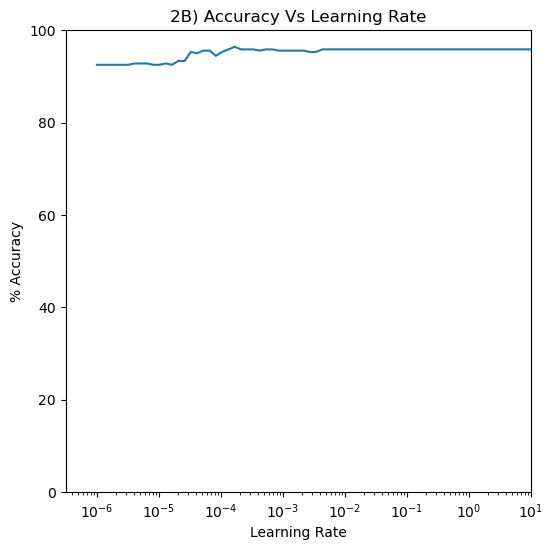


C) 


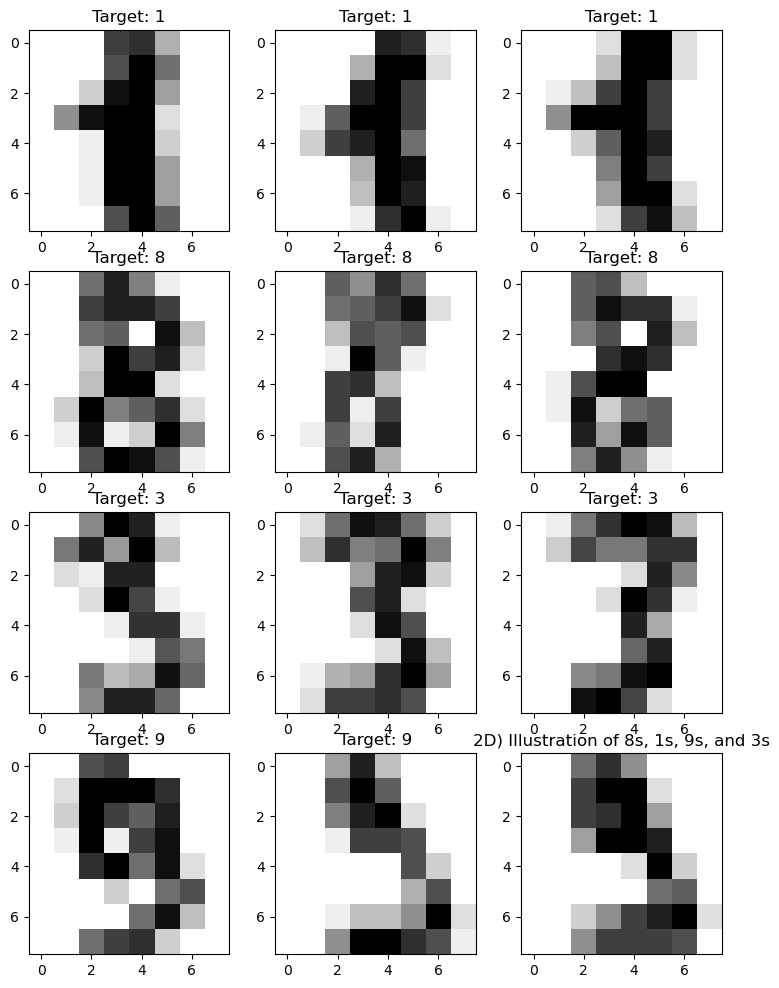

"\n\nIt is unknown exactly what features the perceptron is pulling from this dataset, \nbut from visual inspection:\n1's and 8's don't look too different\nNor do 3's and 8's\nNor do 1's and 9's\n9's and 8's look a bit different on the bottom-left most curve of the 8\n"

In [1]:
# Student ID: 20838709

import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection
import matplotlib.pyplot as plt
import numpy as np

digits = sklearn.datasets.load_digits()


"""
plt.figure(figsize=(12,3))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap='gray_r')
    plt.title(f'target:{digits.target[i]}')
plt.show()
"""

# Part A [DONE]
print("A)")
digits_0_1 = digits.data[(digits.target == 0) | (digits.target == 1)]
digits_0_1_classified = digits.target[(digits.target == 0) | (digits.target == 1)]

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits_0_1, digits_0_1_classified, test_size=0.2, shuffle=True,
)

perceptron = sklearn.linear_model.Perceptron(eta0 = 1.0)

perceptron.fit(X_train, Y_train)

predictions_0_1 = perceptron.predict(X_test)

correct_predictions = 0

for prediction, actual in zip(predictions_0_1, Y_test):
    if prediction == actual:
        correct_predictions += 1
        
pct_accuracy = round(100 * correct_predictions / len(Y_test), 2)

print("Percent Accuracy: ", pct_accuracy, "%")
print()


# Part B [NEED REVIEW]
print("B)")

xmax = 10
learning_rates = np.linspace(0.001, xmax, xmax)
learning_rates = np.logspace(start = -6, stop = 4, num = 100)
accuracies = []
num_misclassifications = np.zeros((10, 10))

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True,
)

for learning_rate in learning_rates:
    
    perceptron = sklearn.linear_model.Perceptron(eta0 = learning_rate)

    perceptron.fit(X_train, Y_train)
    
    predictions = perceptron.predict(X_test)
    
    correct_predictions = 0
    
    for prediction, actual in zip(predictions, Y_test):
        if prediction == actual:
            correct_predictions += 1
        else:
            num_misclassifications[actual][prediction] += 1
            
    pct_accuracy = round(100 * correct_predictions / len(Y_test), 2)
    print("Learning Rate: ", round(learning_rate, 2), ". Accuracy: ", pct_accuracy)
    
    accuracies.append(pct_accuracy)
        
        


plt.figure(figsize=(6,6))
plt.semilogx(learning_rates, accuracies)
plt.xlabel('Learning Rate')
plt.ylabel('% Accuracy')

plt.xlim(0, xmax)
plt.ylim(0, 100)

plt.title("2B) Accuracy Vs Learning Rate")
plt.show()

print()


#C [DONE]
print("C) ")

flat_matrix = num_misclassifications.flatten()

# From observation, the most common misclassifications are 
# 8's being classified as 1's
# 1's being classified as 8's
# 9's being classified as 8's
# 3's being classified as 8's

def extract_every_10th_digit(offset, num_numbers):
    extracted_digits = []
    for i in range(num_numbers):
        extracted_digits.append(digits.data[offset + 10 * i])
        
    return extracted_digits

def extract_every_10th_target(offset, num_numbers):
    extracted_targets = []
    for i in range(num_numbers):
        extracted_targets.append(digits.target[offset + 10 * i])
        
    return extracted_targets

num_numbers = 3

digits_imgs = [extract_every_10th_digit(1, num_numbers),
               extract_every_10th_digit(8, num_numbers),
               extract_every_10th_digit(3, num_numbers),
               extract_every_10th_digit(9, num_numbers)
               ]

digits_targets = [extract_every_10th_target(1, num_numbers),
                  extract_every_10th_target(8, num_numbers),
                  extract_every_10th_target(3, num_numbers),
                  extract_every_10th_target(9, num_numbers)
               ]

fig, axes = plt.subplots(len(digits_imgs), 
                         len(digits_imgs[0]), 
                         figsize=(3*len(digits_imgs[0]), 3*len(digits_imgs)))

for i in range(len(digits_imgs)):
    for j in range(len(digits_imgs[0])):
        axes[i, j].imshow(digits_imgs[i][j].reshape(8,8), cmap='gray_r')
        axes[i, j].set_title("Target: " + str(digits_targets[i][j]))
#        plt.title(f'target:{digits.target[i]}')

plt.title("2D) Illustration of 8s, 1s, 9s, and 3s")
plt.show()

"""

It is unknown exactly what features the perceptron is pulling from this dataset, 
but from visual inspection:
1's and 8's don't look too different
Nor do 3's and 8's
Nor do 1's and 9's
9's and 8's look a bit different on the bottom-left most curve of the 8
"""

This splits all your data in `digits.data` into two parts, `X_train` and `X_test` (with the corresponding outputs in `Y_train` and `Y_test`).  The setting `test_size=0.2` means that the test set will be 20% of the data, and `shuffle=True` means it will randomly choose that 20%.

Note that you can also use the same function to split your training data into training data and validation data.

**a) [1 mark]** Let's start with only considering the digit data for 0's and 1's.  We can extract just that data with `X = digits.data[(digits.target == 0) | (digits.target == 1)]` and `Y = digits.target[(digits.target == 0) | (digits.target == 1)]`.  Split the data into 80% training and 20% testing.  Create a Perceptron with a learning rate of 1.0 and train it on your training data.  Report the accuracy (i.e. how often the model gives the correct output) on your testing data.

**b) [1 mark]** Repeat the above, but with the entire data set (i.e. all 10 digits).  Report the accuracy.  How does the accuracy change as you adjust the learning rate?  Make a plot that shows this.

**c) [1 mark]** What mistakes does the model make?  What digits does it tend to mistake for other digits?  Use the `plt.imshow(digits.data[i].reshape(8,8), cmap='gray_r')` command given above to plot some of the digits that it gets wrong.  Why do you think it has problems with these digits?

### Question 3:

The following code generates the same data that was used to demonstrate curve fitting in class.  `train_x` and `train_y` are the 10 data points we use for doing the curve fitting, and `test_x` and `test_y` are the data we used to test how well the fit generalizes.

A)


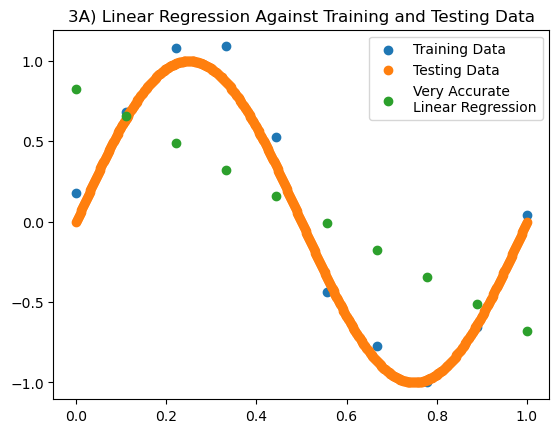

Weights:  [[ 0.82474435 -1.50188406]]
RMSE Regression vs Training:  0.55
RMSE Regression vs Testing:  0.47

B)


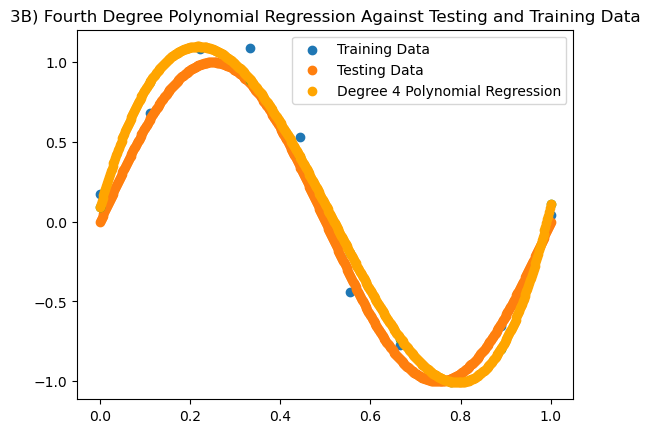

Regression weights:  [[  0.09121908   9.97654202 -27.72073974  13.5425296    4.2194939 ]]
RMSE Regression vs Training:  0.14
RMSE Regression vs Testing:  0.27

C)
Degree 0 Regression
Weights:  [[0.07380232]]
RMSE Regression vs Training:  0.73
RMSE Regression vs Testing:  0.71



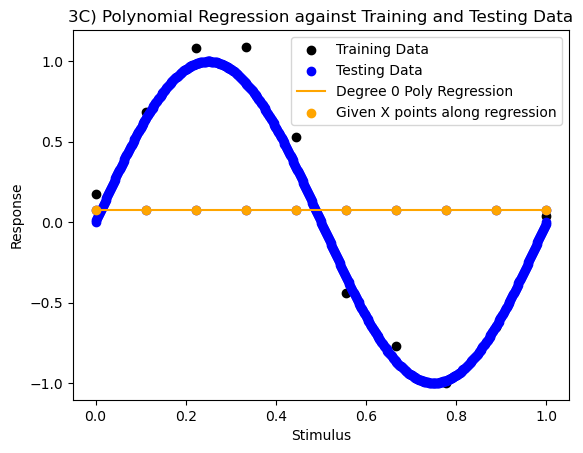

Degree 1 Regression
Weights:  [[ 0.82474435 -1.50188406]]
RMSE Regression vs Training:  0.55
RMSE Regression vs Testing:  0.46



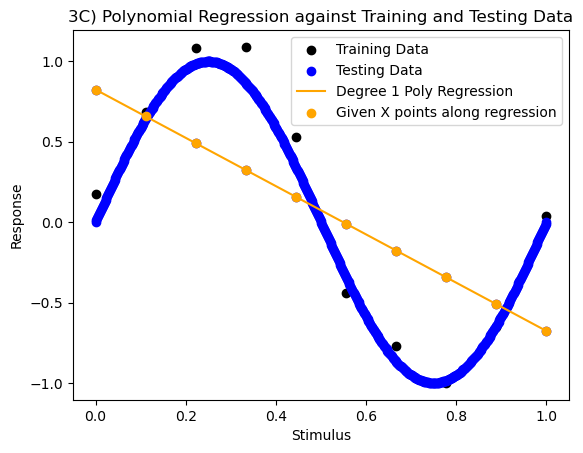

Degree 2 Regression
Weights:  [[ 0.82329133 -1.49207618 -0.00980788]]
RMSE Regression vs Training:  0.55
RMSE Regression vs Testing:  0.46



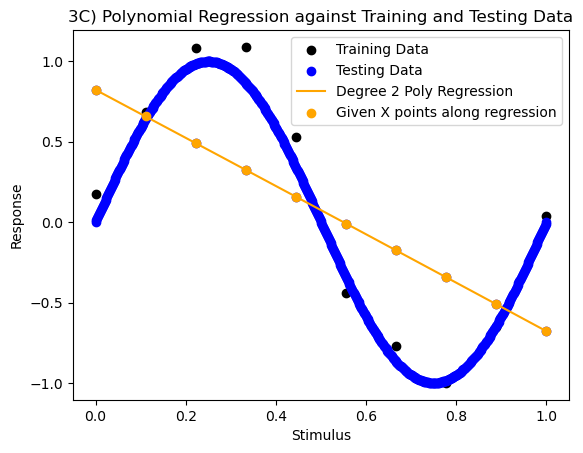

Degree 3 Regression
Weights:  [[  0.0634364   11.01839237 -32.98208399  21.98151741]]
RMSE Regression vs Training:  0.14
RMSE Regression vs Testing:  0.13



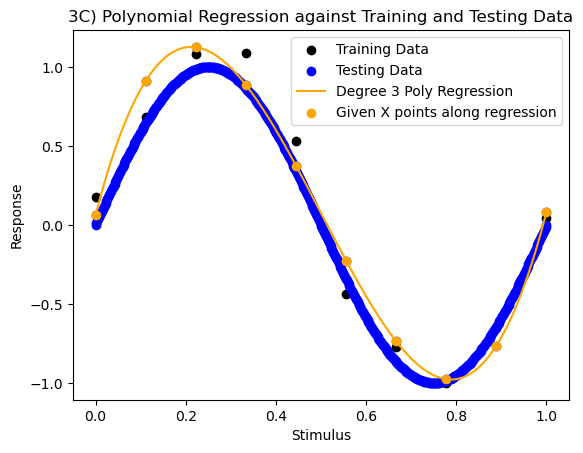

Degree 4 Regression
Weights:  [[  0.09121908   9.97654202 -27.72073974  13.5425296    4.2194939 ]]
RMSE Regression vs Training:  0.14
RMSE Regression vs Testing:  0.13



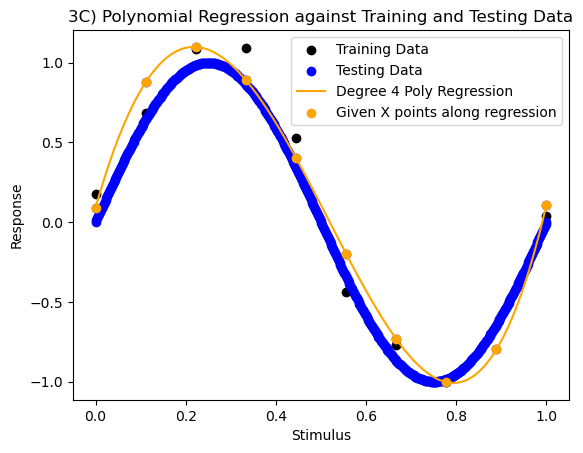

Degree 5 Regression
Weights:  [[ 1.71799890e-01  2.63563033e+00  3.34703120e+01 -1.59424177e+02
   2.02478502e+02 -7.93036031e+01]]
RMSE Regression vs Training:  0.07
RMSE Regression vs Testing:  0.1



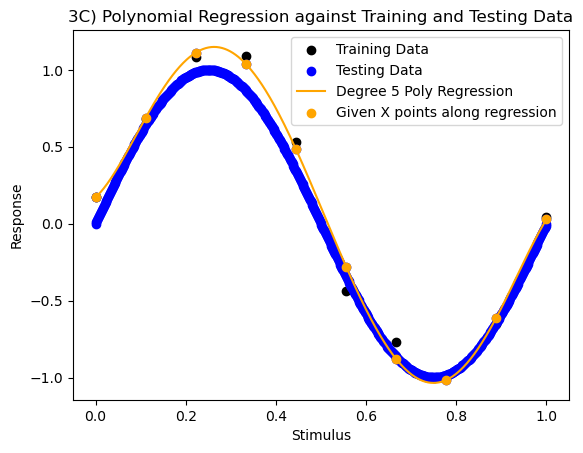

Degree 6 Regression
Weights:  [[ 1.82506747e-01 -2.21494676e-01  6.87194293e+01 -3.11139683e+02
   4.95665058e+02 -3.40098167e+02  8.69315214e+01]]
RMSE Regression vs Training:  0.06
RMSE Regression vs Testing:  0.1



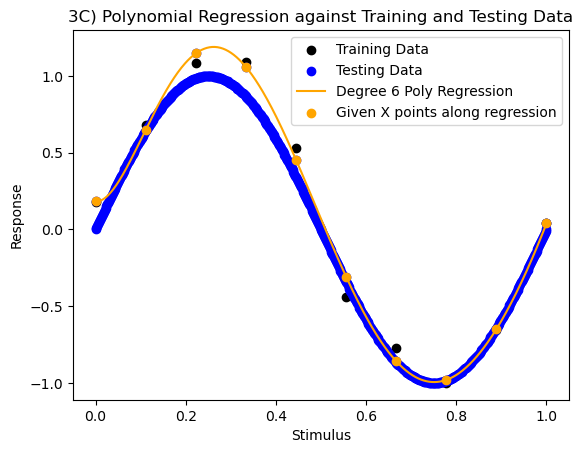

Degree 7 Regression
Weights:  [[ 1.77919471e-01  4.73928463e+00 -1.31373121e+01  1.74280145e+02
  -8.76889127e+02  1.66148588e+03 -1.36563085e+03  4.15017820e+02]]
RMSE Regression vs Training:  0.05
RMSE Regression vs Testing:  0.1



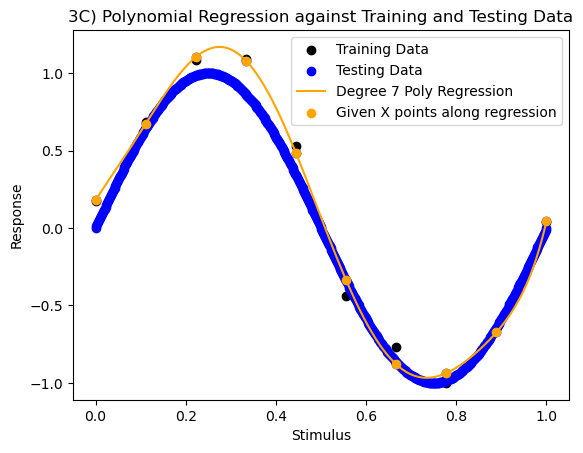

Degree 8 Regression
Weights:  [[ 1.75813185e-01  1.98132850e+01 -3.17126124e+02  2.46713996e+03
  -9.52657618e+03  1.96693031e+04 -2.23747511e+04  1.32777446e+04
  -3.21568171e+03]]
RMSE Regression vs Training:  0.04
RMSE Regression vs Testing:  0.14



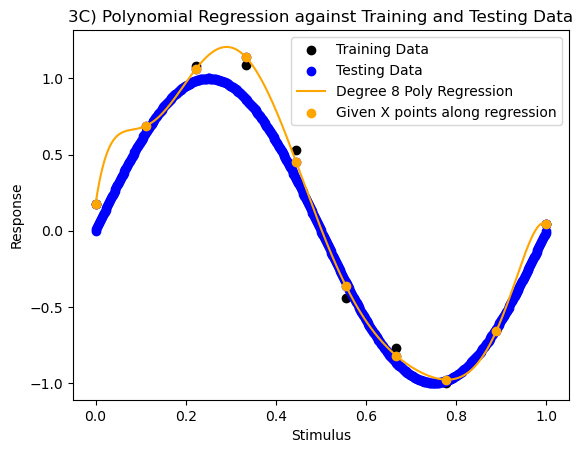

Degree 9 Regression
Weights:  [[ 1.76405280e-01 -4.19905446e+01  1.11043347e+03 -1.03914026e+04
   5.08810887e+04 -1.44903476e+05  2.47103005e+05 -2.48098763e+05
   1.35071421e+05 -3.07304508e+04]]
RMSE Regression vs Training:  0.0
RMSE Regression vs Testing:  0.29



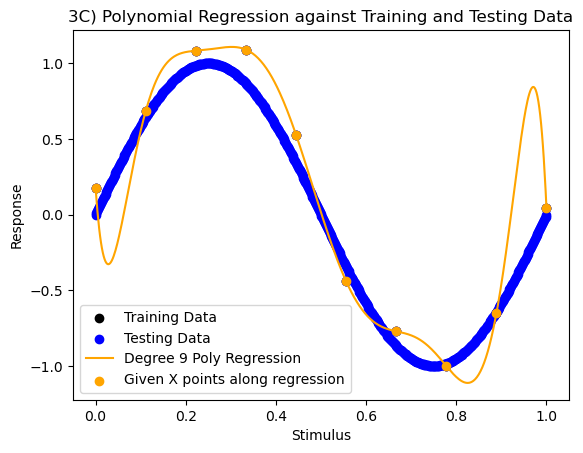

Degree 10 Regression
Weights:  [[ 1.76405157e-01 -2.45046087e+01  6.65230976e+02 -5.81426025e+03
   2.54599081e+04 -5.97567123e+04  6.70697049e+04 -6.10195625e+03
  -6.54407927e+04  6.26117568e+04 -1.86685098e+04]]
RMSE Regression vs Training:  0.0
RMSE Regression vs Testing:  0.32



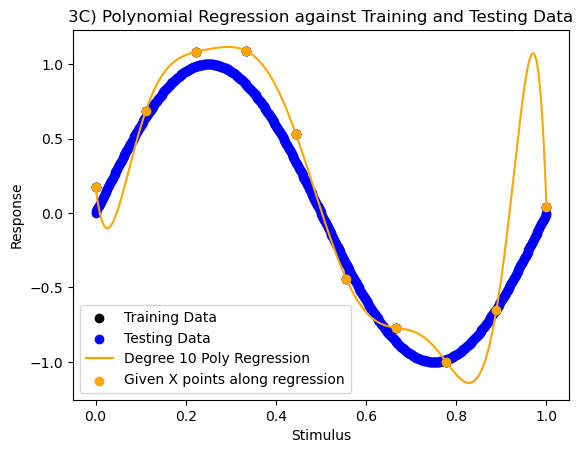

Degree 11 Regression
Weights:  [[ 1.76405208e-01 -1.46522054e+01  4.25592703e+02 -3.52071754e+03
   1.40712529e+04 -2.80822989e+04  2.02347635e+04  1.47882724e+04
  -2.32085315e+04 -1.34040151e+04  3.06850990e+04 -1.19749006e+04]]
RMSE Regression vs Training:  0.0
RMSE Regression vs Testing:  0.37



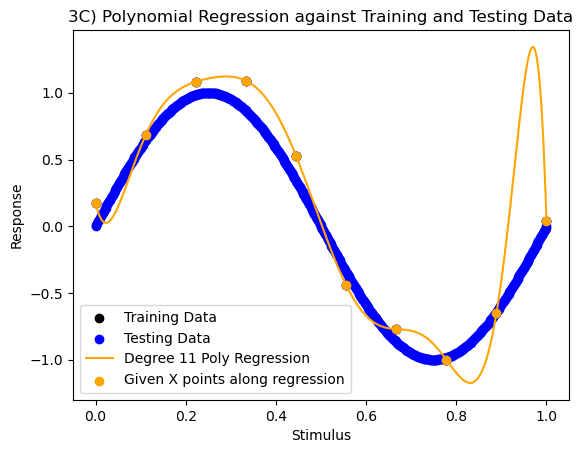

Degree 12 Regression
Weights:  [[ 1.76405242e-01 -8.78188935e+00  2.87905458e+02 -2.27636380e+03
   8.42754617e+03 -1.46452704e+04  6.18644511e+03  1.14664604e+04
  -5.11249561e+03 -1.28357423e+04  8.78397225e+02  1.56772686e+04
  -8.04550431e+03]]
RMSE Regression vs Training:  0.0
RMSE Regression vs Testing:  0.44



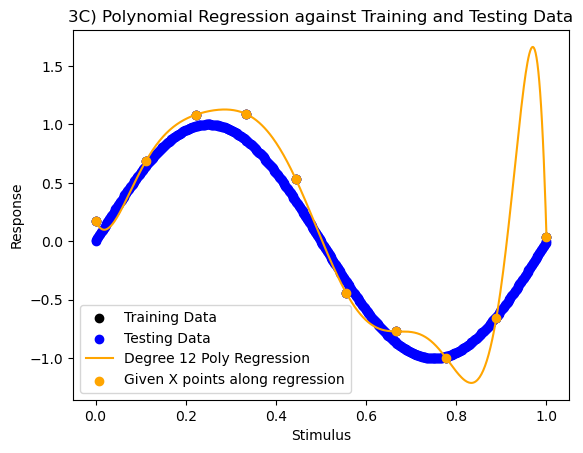

Degree 13 Regression
Weights:  [[ 1.76405240e-01 -5.11393762e+00  2.04354058e+02 -1.55560019e+03
   5.39289477e+03 -8.31651117e+03  1.57717320e+03  7.29768927e+03
   4.23251761e+02 -6.79685783e+03 -4.80414093e+03  3.97161866e+03
   8.23573359e+03 -5.62462660e+03]]
RMSE Regression vs Training:  0.0
RMSE Regression vs Testing:  0.52



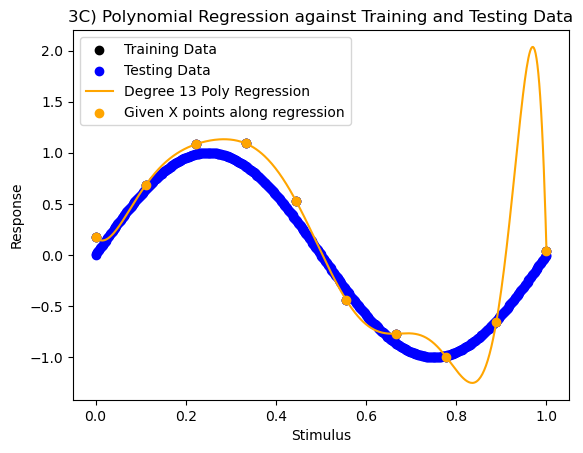

Degree 14 Regression
Weights:  [[ 1.76405233e-01 -2.72645424e+00  1.51247855e+02 -1.11462643e+03
   3.64740575e+03 -5.06967333e+03  5.86470331e+00  4.54281210e+03
   1.78899639e+03 -3.10342257e+03 -4.26696258e+03 -7.70023434e+02
   3.87913720e+03  4.38176237e+03 -4.06992691e+03]]
RMSE Regression vs Training:  0.0
RMSE Regression vs Testing:  0.61



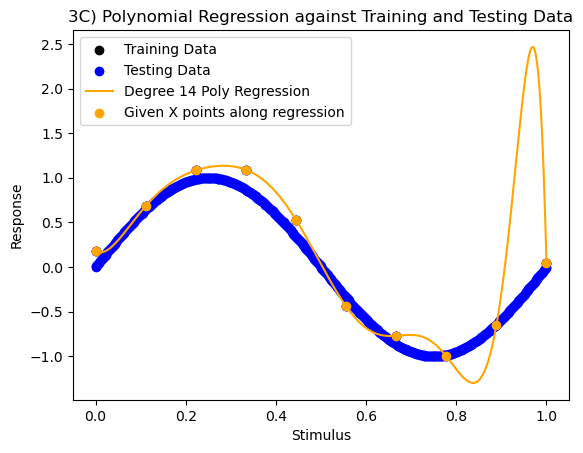

Degree 15 Regression
Weights:  [[ 1.76405234e-01 -1.11616402e+00  1.16121251e+02 -8.32013649e+02
   2.58511296e+03 -3.28106240e+03 -5.10314396e+02  2.88031839e+03
   1.89264791e+03 -1.23604216e+03 -2.94187660e+03 -1.88215910e+03
   8.77376570e+02  3.05304595e+03  2.31452918e+03 -3.03470309e+03]]
RMSE Regression vs Training:  0.0
RMSE Regression vs Testing:  0.72



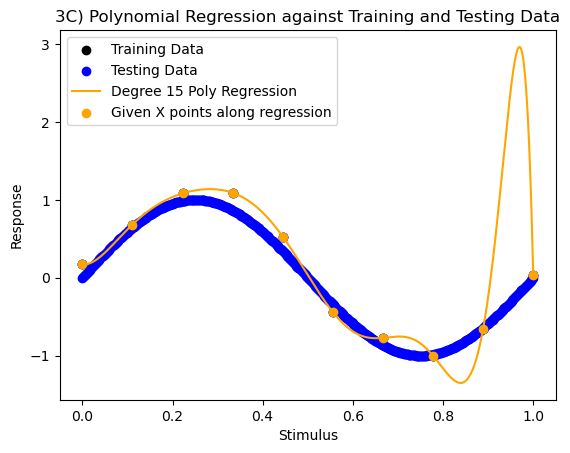

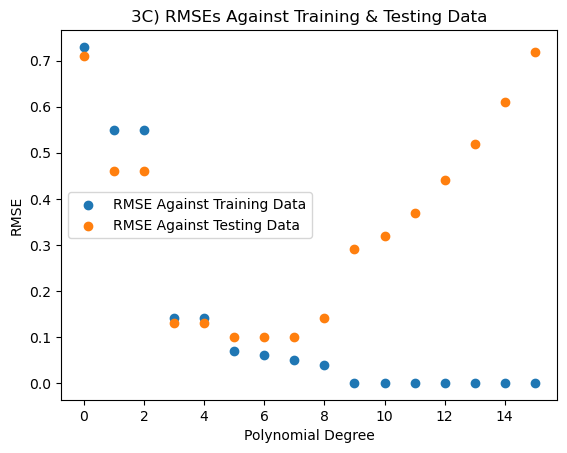

D)


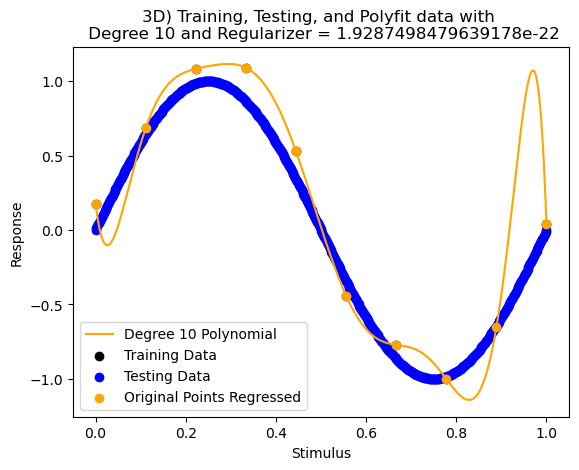

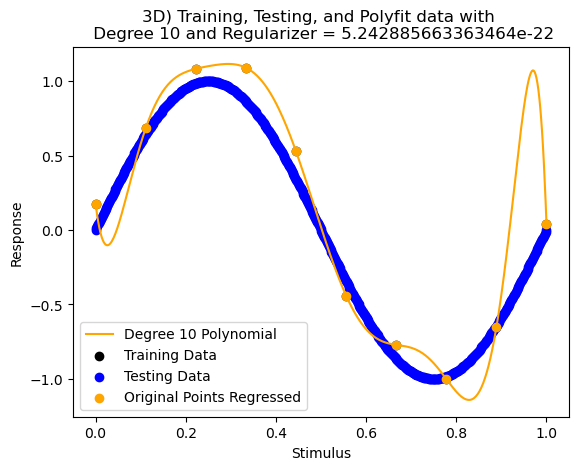

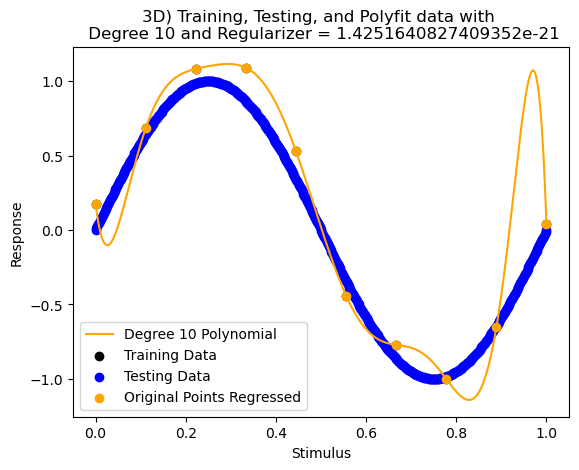

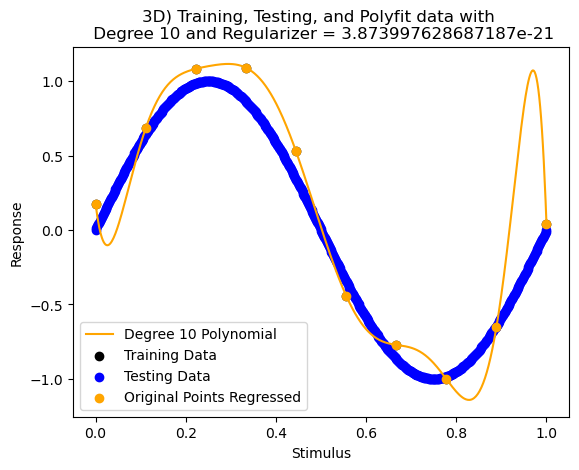

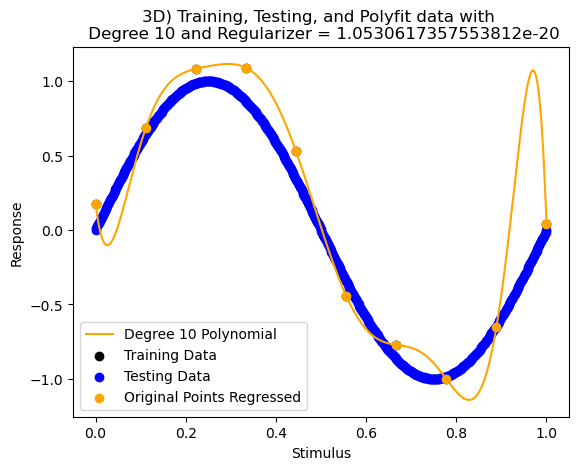

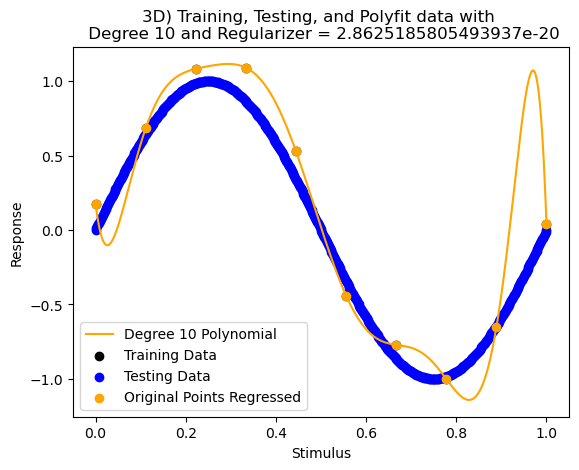

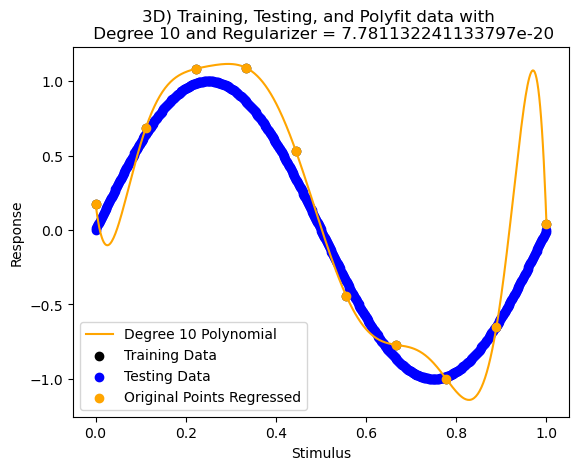

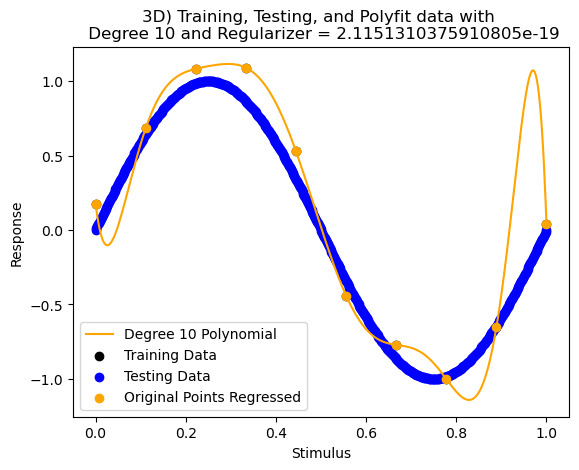

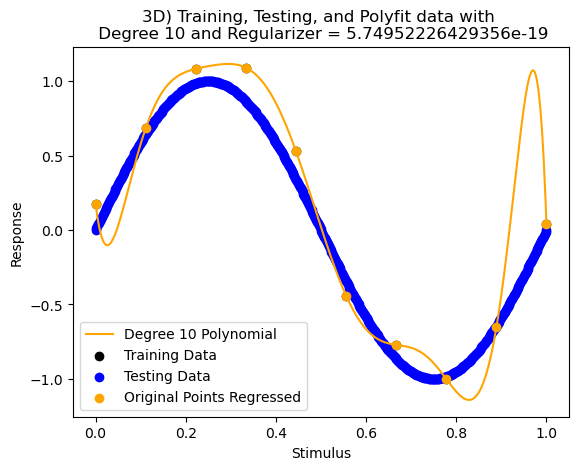

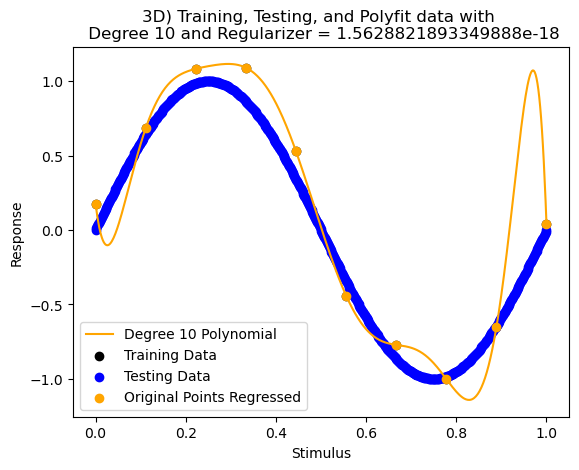

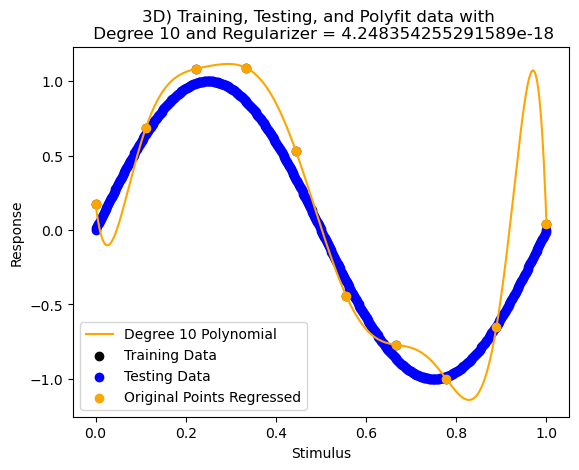

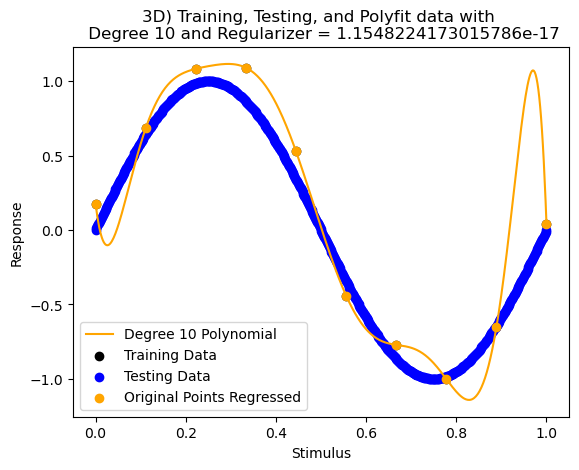

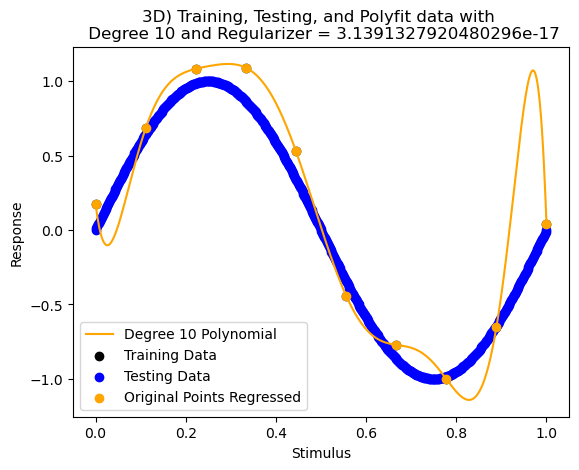

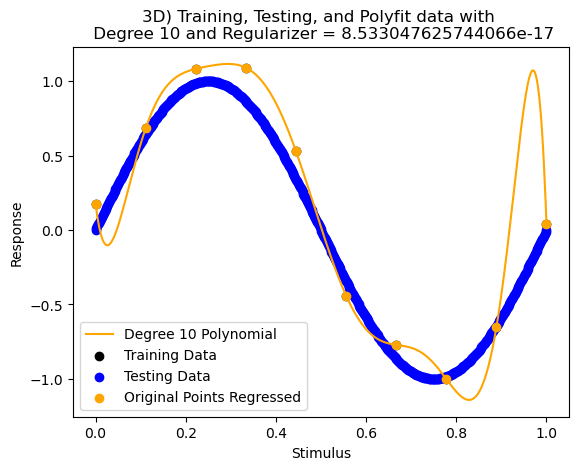

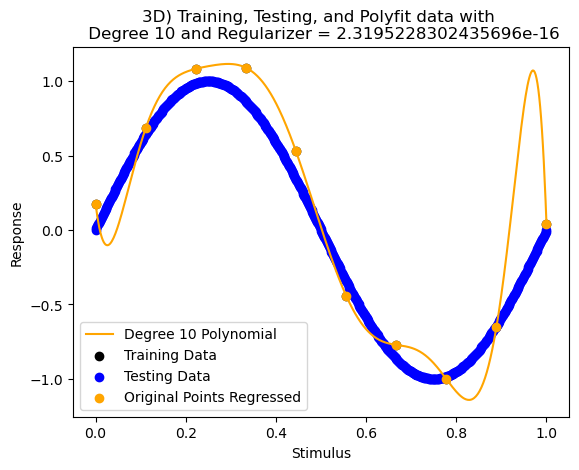

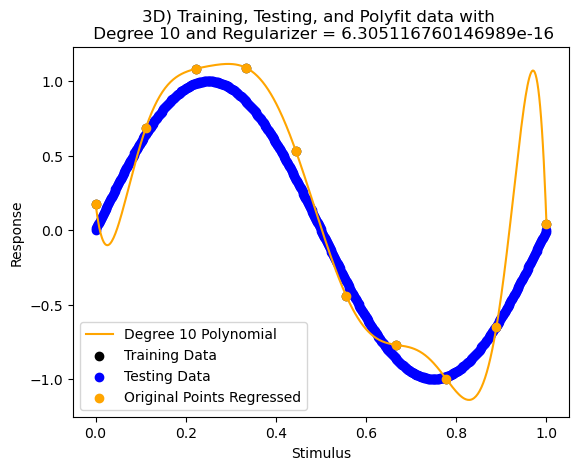

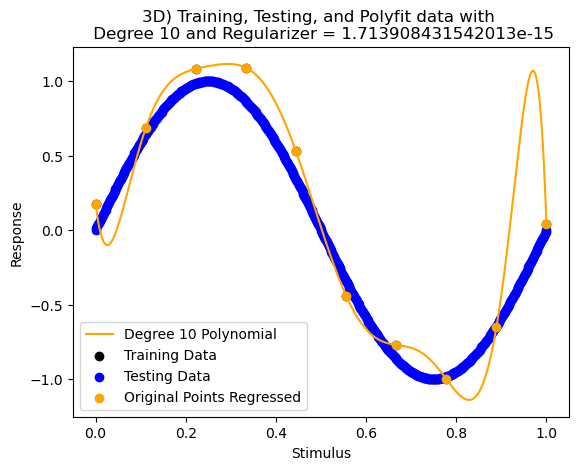

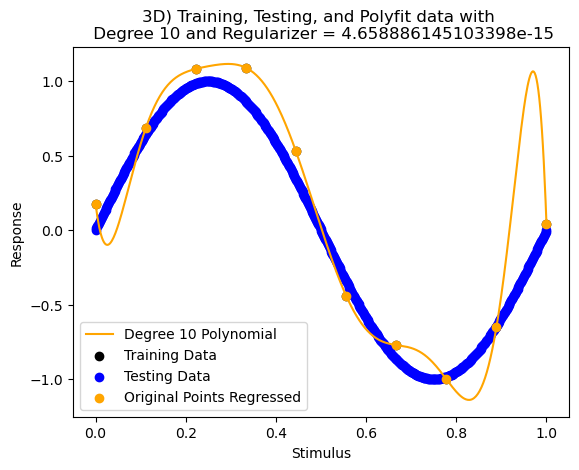

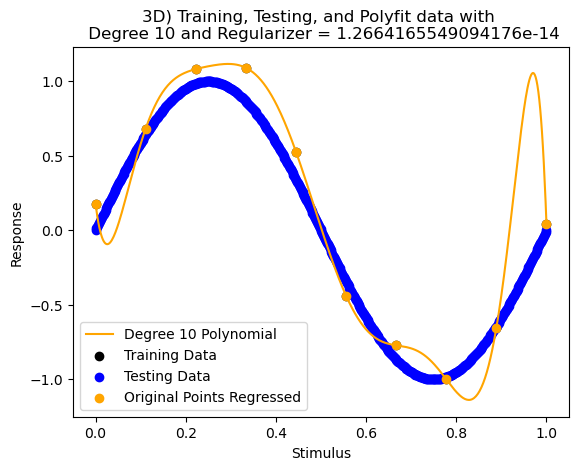

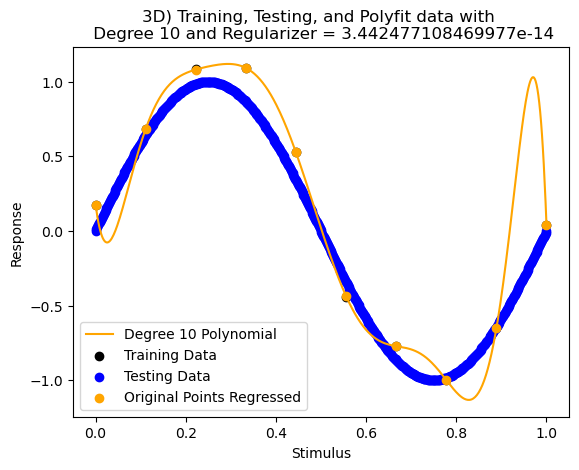

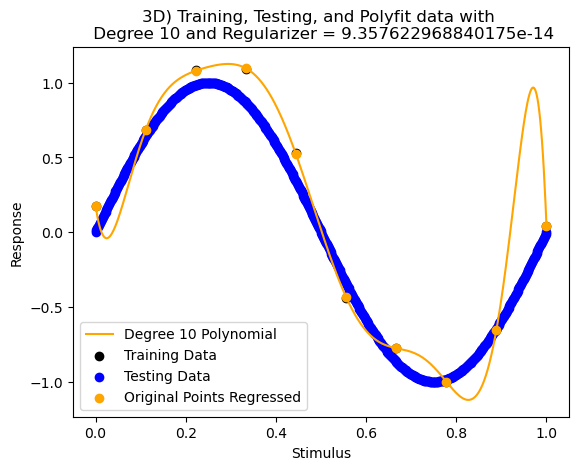

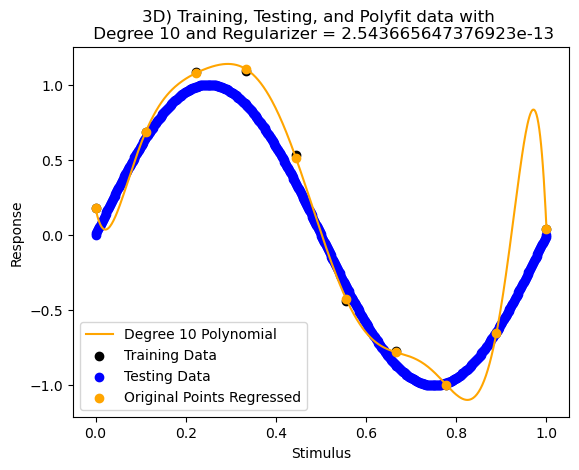

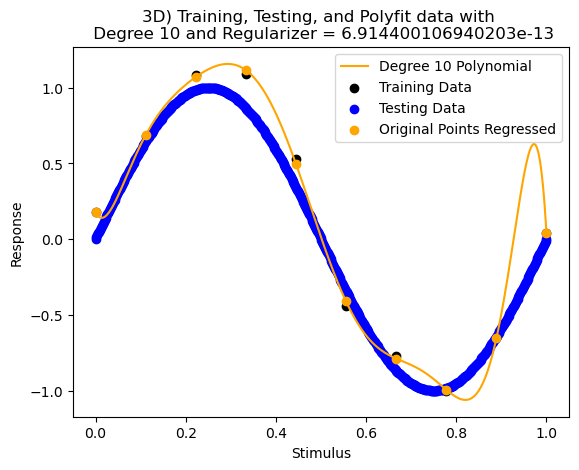

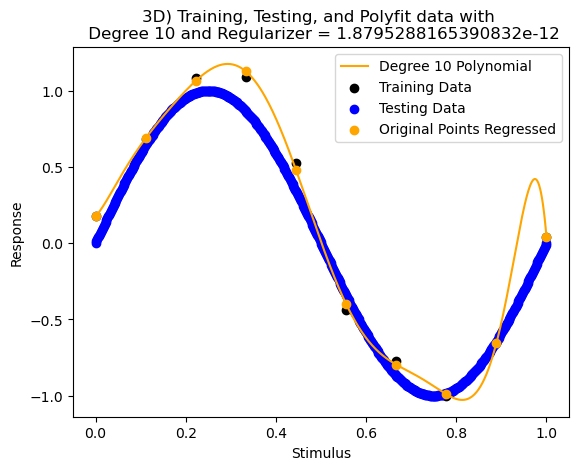

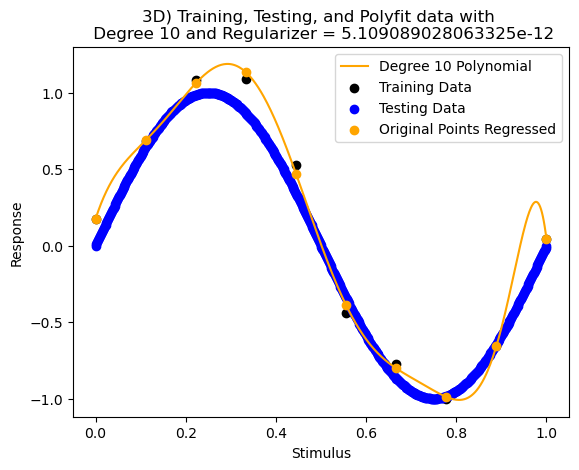

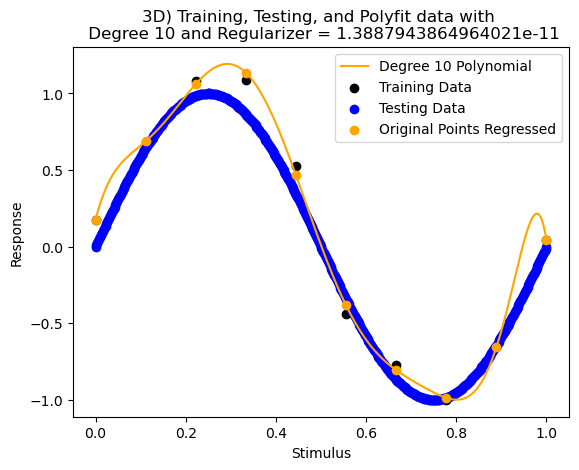

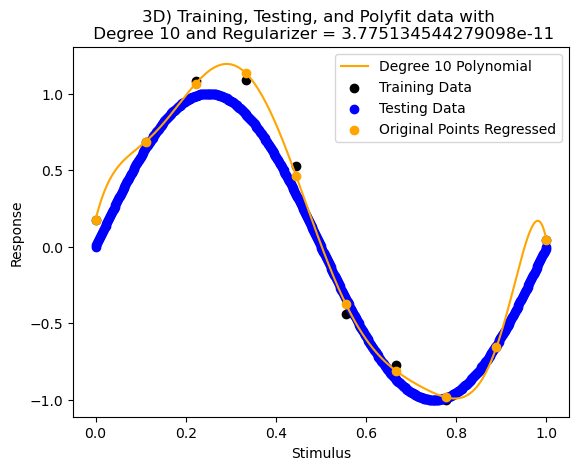

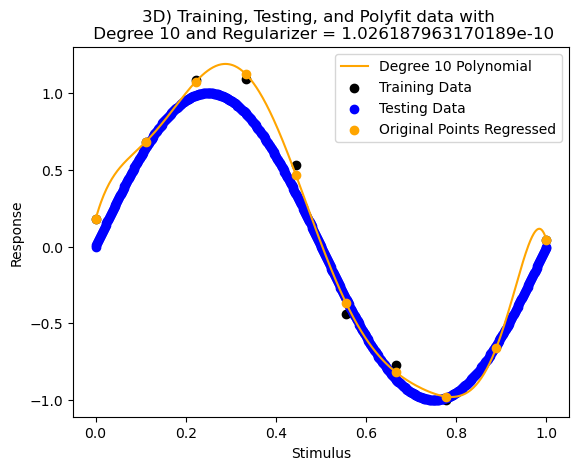

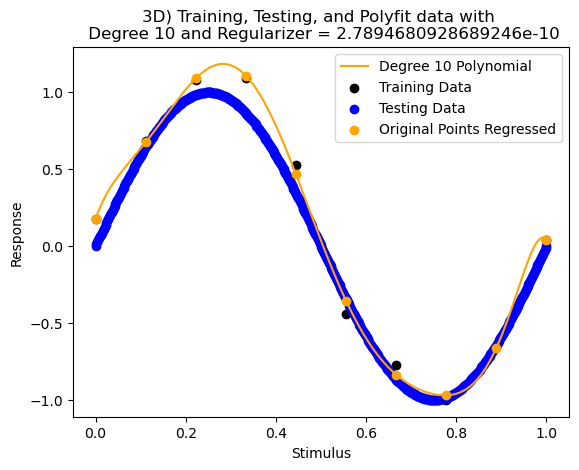

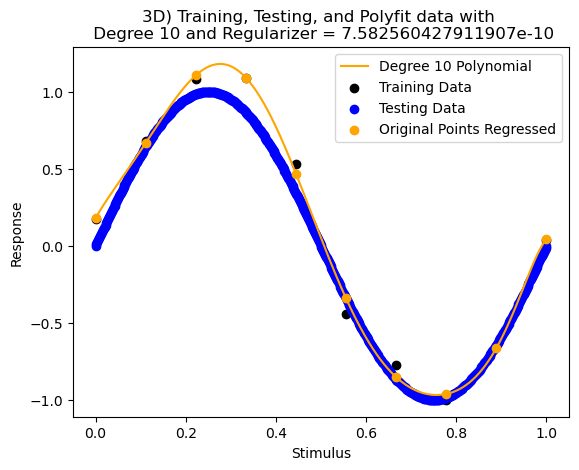

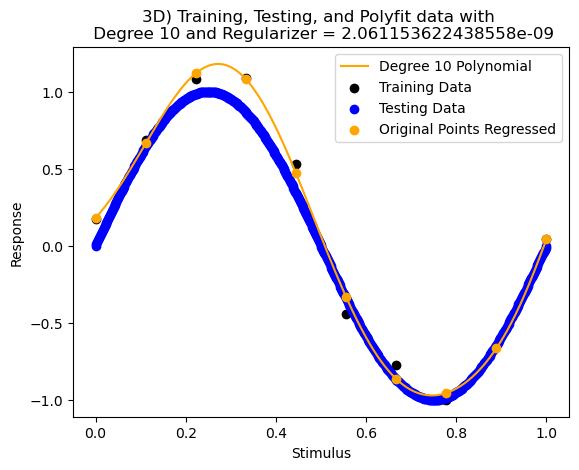

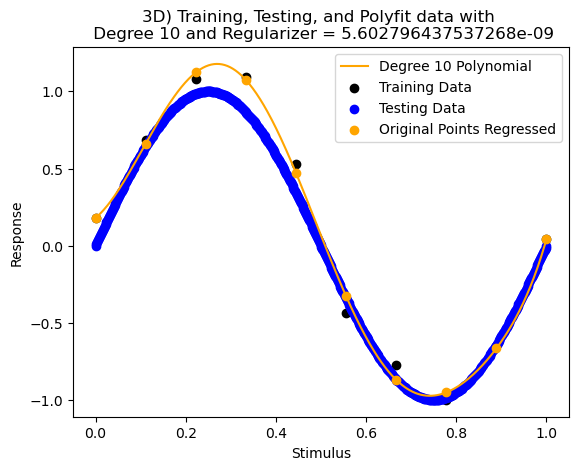

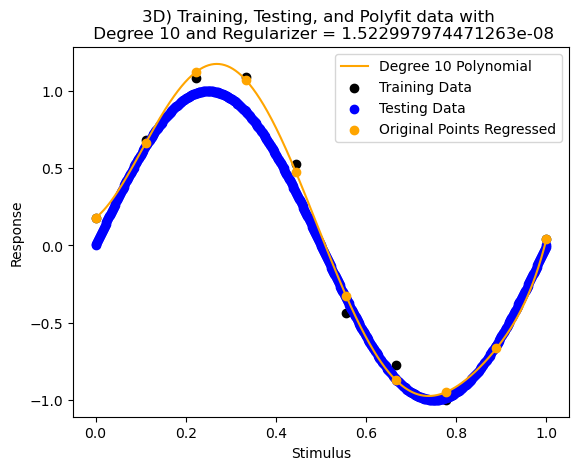

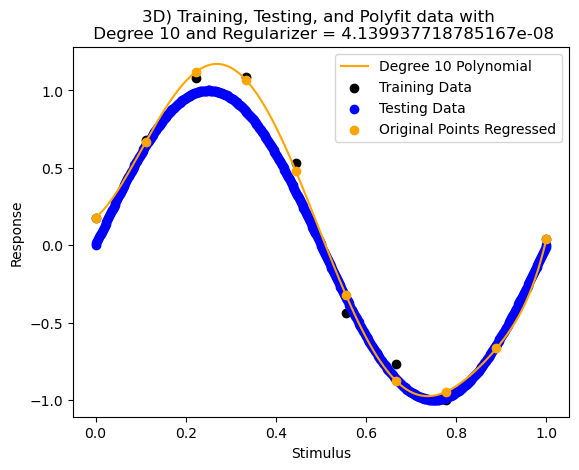

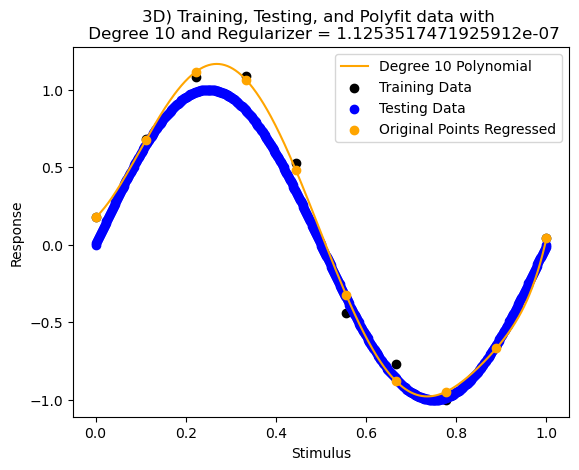

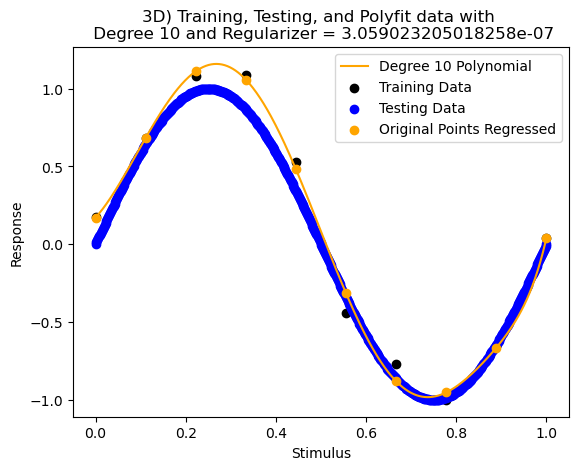

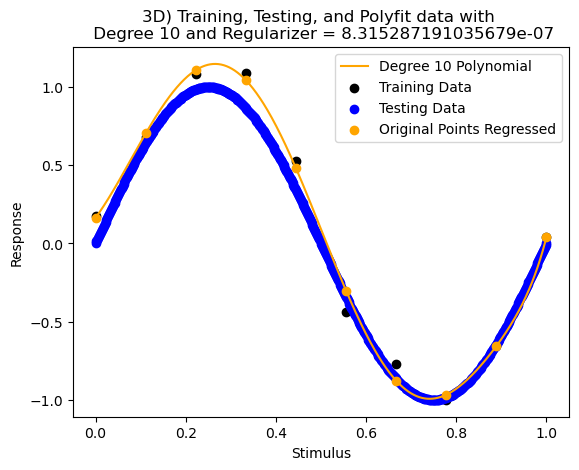

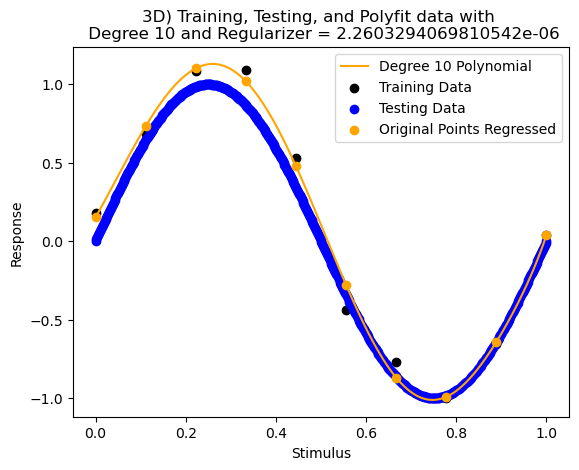

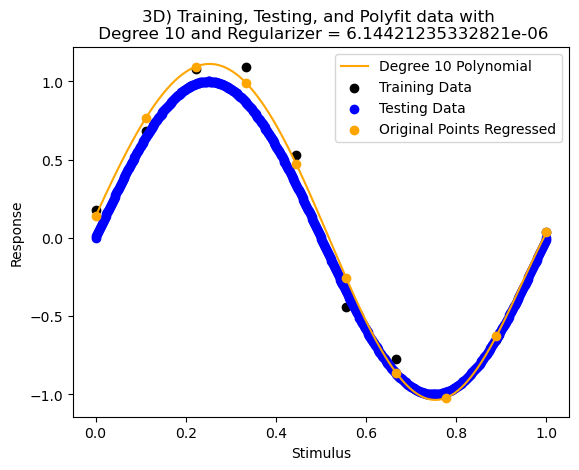

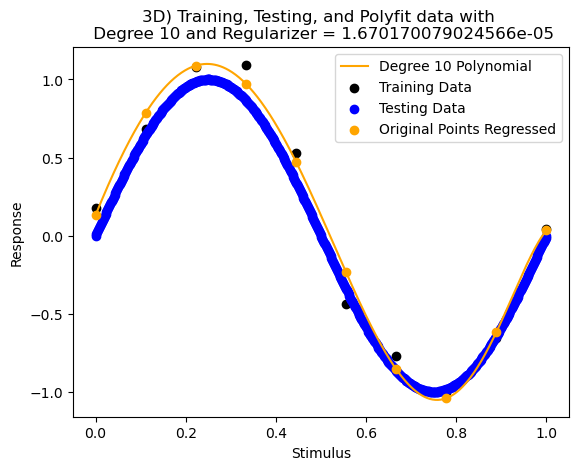

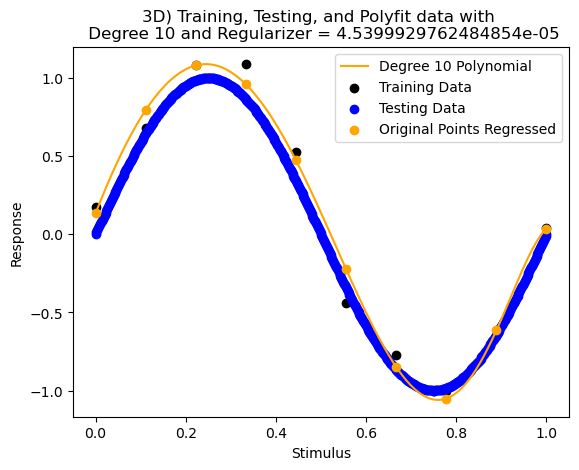

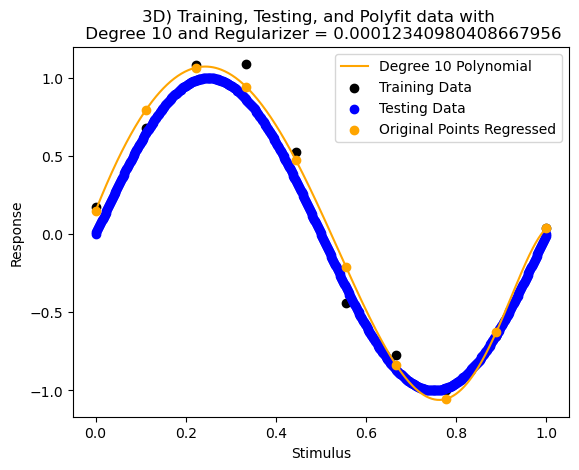

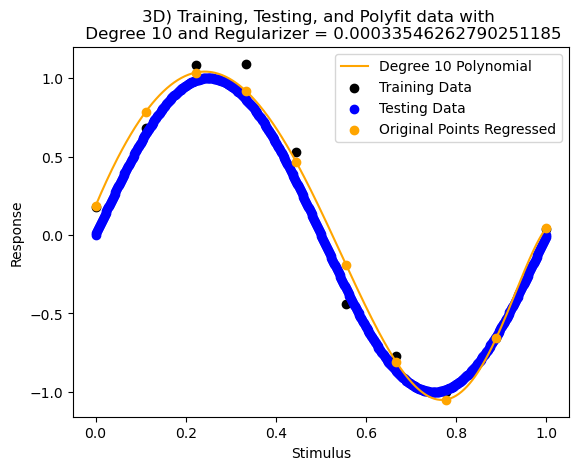

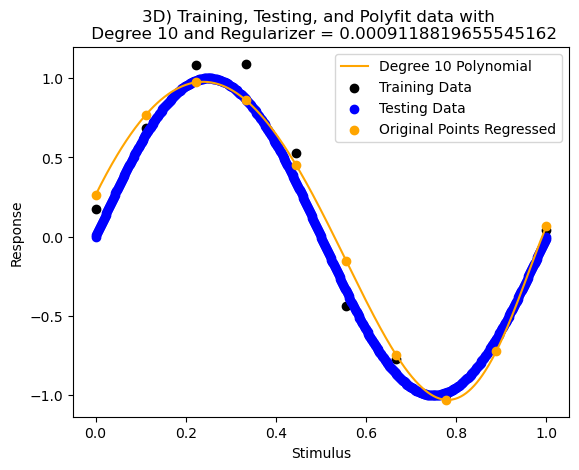

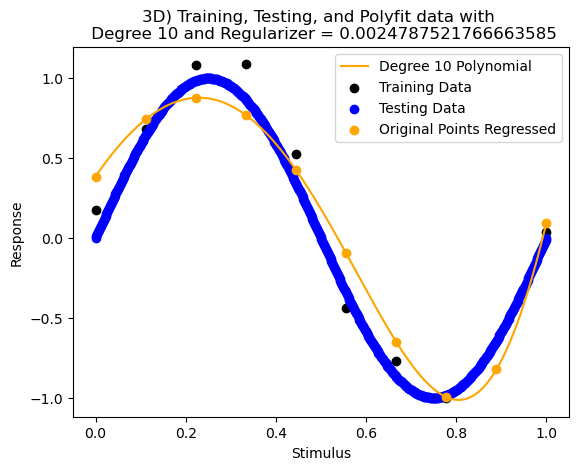

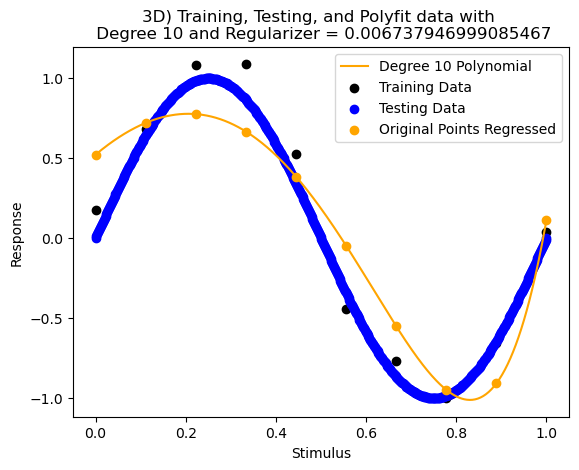

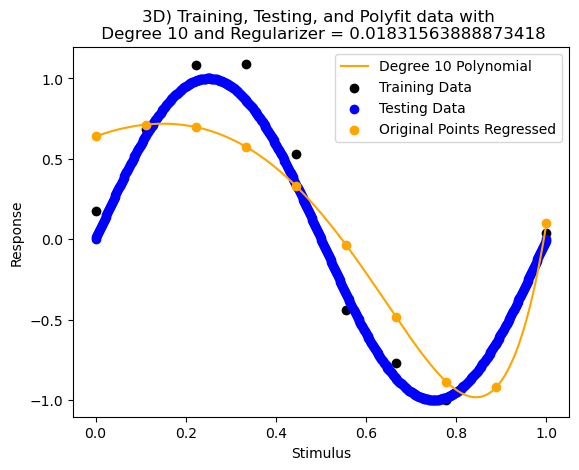

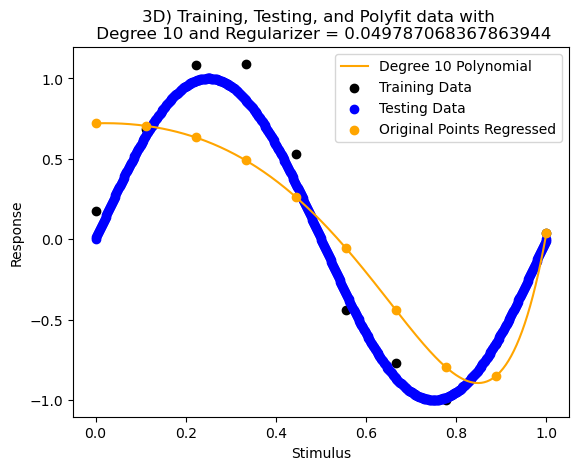

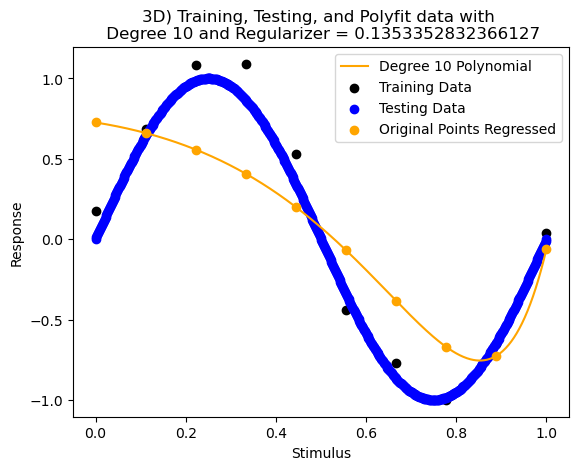

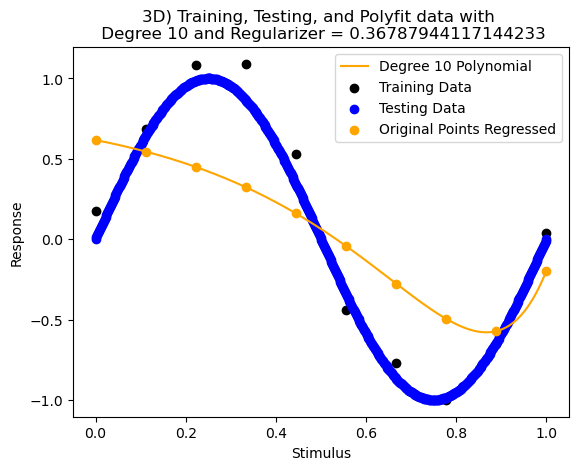

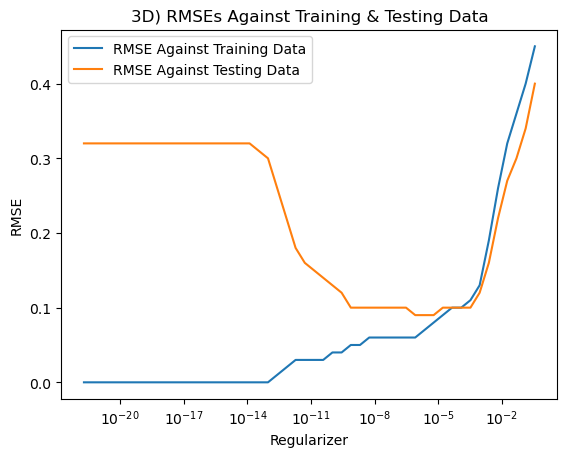

In [2]:
#Student ID: 20838709

import matplotlib.pyplot as plt
import numpy as np


def generate_x_train_matrix(x_test_points, highest_degree_poly):

    columns = []

    for degree in range(highest_degree_poly + 1):
        columns.append(train_x ** degree)

    train_x_matrix = np.matrix(np.column_stack(columns))
    
    return train_x_matrix
    
def get_least_sqaures_inv(train_x_matrix):
    comp1 = np.transpose(train_x_matrix) * train_x_matrix
    comp2 = np.linalg.pinv(comp1)
    least_sqaures_inv = comp2 * np.transpose(train_x_matrix)

    return least_sqaures_inv

def get_regularized_inv(train_x_matrix, regularizer):
    
    comp1 = np.transpose(train_x_matrix) * train_x_matrix
    comp2 = comp1 + regularizer * np.identity(comp1.shape[0])
    comp2 = np.linalg.pinv(comp2)
    regularized_inv = comp2 * np.transpose(train_x_matrix)
    
    return regularized_inv

def get_RMSE(Y_desired, Y_actual):
    summation = 0
    for des, act in zip(Y_desired, Y_actual):
        summation += (des - act) ** 2
        
    summation /= len(Y_desired)
    
    summation = round(np.sqrt(summation), 2)
    
    return summation

rng = np.random.RandomState(seed=0)

train_x = np.linspace(0, 1, 10)
train_y = np.sin(train_x*2*np.pi) + rng.normal(0,0.1,size=10)

test_x = np.linspace(0, 1, 500)
test_y = np.sin(test_x*2*np.pi)

# A)
print("A)")

plt.scatter(train_x, train_y, label= "Training Data")
plt.scatter(test_x, test_y, label= "Testing Data")

train_x_matrix = generate_x_train_matrix(train_x, 1)

weights = get_least_sqaures_inv(train_x_matrix) * np.transpose(np.matrix(train_y))

regression_y = train_x_matrix * weights
    
plt.scatter(train_x, np.array(regression_y), label= "Very Accurate \nLinear Regression")
plt.legend()
plt.title("3A) Linear Regression Against Training and Testing Data")

plt.show()
rmse_regression_vs_training = get_RMSE(train_y, np.array(regression_y.T)[0])
# Only want every 50th item from test_y, since test_x covers same range as
# train_x, but with 50x greater resolution.
rmse_regression_vs_testing = get_RMSE(test_y[::50], np.array(regression_y.T)[0])

print("Weights: ", weights.T)
print("RMSE Regression vs Training: ", rmse_regression_vs_training)
print("RMSE Regression vs Testing: ", rmse_regression_vs_testing)

print()


# B)

print("B)")

plt.scatter(train_x, train_y, label= "Training Data")
plt.scatter(test_x, test_y, label= "Testing Data")

train_x_matrix = generate_x_train_matrix(train_x, 4)

weights = get_least_sqaures_inv(train_x_matrix) * np.transpose(np.matrix(train_y))

regressed_output = train_x_matrix * weights

plt.scatter(train_x, np.array(regressed_output))

polynomial_y = np.polyval(weights[::-1], test_x)
plt.scatter(test_x, polynomial_y, color="orange", label="Degree 4 Polynomial Regression")
plt.title("3B) Fourth Degree Polynomial Regression Against Testing and Training Data")
plt.legend()
plt.show()

print("Regression weights: ", weights.T)

rmse_regression_vs_training = get_RMSE(train_y, np.array(regressed_output.T)[0])
# Only want every 50th item from test_y, since test_x covers same range as
# train_x, but with 50x greater resolution.
rmse_regression_vs_testing = get_RMSE(test_y[::50], np.array(regressed_output.T)[0])

print("RMSE Regression vs Training: ", rmse_regression_vs_training)
print("RMSE Regression vs Testing: ", rmse_regression_vs_testing)

print()


# C)

print("C)")


# This is calculating the RMSE of the training 
RMSEs_against_training = []
RMSEs_against_testing = []
max_poly_deg = 15
degree_linsapce = np.linspace(0, max_poly_deg, max_poly_deg + 1).astype(int)

for poly_degree in degree_linsapce:
    
    plt.scatter(train_x, train_y, label= "Training Data", color="black")
    plt.scatter(test_x, test_y, label = "Testing Data", color="blue")
    
    train_x_matrix = generate_x_train_matrix(train_x, poly_degree)
    
    weights = get_least_sqaures_inv(train_x_matrix) * np.transpose(np.matrix(train_y))
    
    regressed_output = train_x_matrix * weights
    
    plt.scatter(train_x, np.array(regressed_output), color='blue')
    
    polynomial_y = np.polyval(weights[::-1], test_x)
    
    plt.plot(test_x, polynomial_y, color="orange",
             label = "Degree " + str(poly_degree) + " Poly Regression")
    
    original_points_regressed = np.polyval(weights[::-1], train_x)
    
    plt.scatter(train_x, original_points_regressed, color="orange", label="Given X points along regression")
    
    regressed_output_for_rmse = np.array(regressed_output.T)[0]
    
    rmse_regression_vs_training = get_RMSE(train_y, regressed_output_for_rmse)
    rmse_regression_vs_testing = get_RMSE(test_y, polynomial_y)

    RMSEs_against_training.append(rmse_regression_vs_training)
    RMSEs_against_testing.append(rmse_regression_vs_testing)

    print("Degree " + str(poly_degree) + " Regression")
    print("Weights: ", weights.T)
    print("RMSE Regression vs Training: ", rmse_regression_vs_training)
    print("RMSE Regression vs Testing: ", rmse_regression_vs_testing)
    print()
    
    plt.title("3C) Polynomial Regression against Training and Testing Data")
    plt.xlabel("Stimulus")
    plt.ylabel("Response")
    plt.legend()
    plt.show()
    
print()



plt.scatter(degree_linsapce, RMSEs_against_training,
            label="RMSE Against Training Data")

plt.scatter(degree_linsapce, RMSEs_against_testing,
            label="RMSE Against Testing Data")
plt.legend()
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("3C) RMSEs Against Training & Testing Data")
plt.show()


# D)

print("D)")

lambds = np.exp(np.linspace(-50,-1, 50))

RMSEs_against_training = []
RMSEs_against_testing = []

for regularizer in lambds:

    train_x_matrix = generate_x_train_matrix(train_x, 10)
    
    weights = get_regularized_inv(train_x_matrix, regularizer) * np.transpose(np.matrix(train_y))
    
    regressed_output = train_x_matrix * weights
    
    polynomial_y = np.polyval(weights[::-1], test_x)
    plt.plot(test_x, polynomial_y, label="Degree 10 Polynomial", color="orange")
    
    plt.scatter(train_x, train_y, label= "Training Data", color="black")
    plt.scatter(test_x, test_y, label = "Testing Data", color="blue")
    
    original_points_regressed = np.polyval(weights[::-1], train_x)
    plt.scatter(train_x, original_points_regressed, color="orange", 
                label="Original Points Regressed")
    
    plt.title("3D) Training, Testing, and Polyfit data with \n Degree 10 and Regularizer = " + str(regularizer))
    plt.legend()
    plt.xlabel("Stimulus")
    plt.ylabel("Response")
    plt.show()
    
    regressed_output_for_rmse = np.array(regressed_output.T)[0]
    
    rmse_regression_vs_training = get_RMSE(train_y, regressed_output_for_rmse)
    rmse_regression_vs_testing = get_RMSE(test_y, polynomial_y)

    RMSEs_against_training.append(rmse_regression_vs_training)
    RMSEs_against_testing.append(rmse_regression_vs_testing)

plt.semilogx(lambds, RMSEs_against_training,
            label="RMSE Against Training Data")

plt.semilogx(lambds, RMSEs_against_testing,
            label="RMSE Against Testing Data")
plt.legend()
plt.xlabel("Regularizer")
plt.ylabel("RMSE")
plt.title("3D) RMSEs Against Training & Testing Data")
plt.show()


**a) [1 mark]** Find the weights that best fit this data using linear regression.  This should generate two weights: one that is multiplied by the input value and one that is mulitplied by the feature that is constantly a 1.  Implement this yourself, rather than using the `sklearn.linear_model.LinearRegression` implementation that we will use in Question 4.  To invert the matrix, use `np.linalg.pinv`.  

Plot the training data, the ideal testing output, and the actual testing output.  Report the weights found by regression.  Compute and report the Root Mean Squared Error (`np.sqrt(np.mean((Y-output)**2))` where `Y` is the vector of desired outputs and `output` is the vector of the actual outputs from the model) for both the training data and the testing data.

**b) [1 mark]** Repeat part a), but use the first 5 polynomials as features ($x^0, x^1, x^2, x^3, x^4$).  Plot the training data, the ideal testing output, and the actual testing output.  Report the weights found by regression.  Compute and report the Root Mean Squared Error for both the training data and the testing data.  Do not use regularization.

**c) [1 mark]** Vary the number of polynomials you use from 1 up to 15.  Compute the Root Mean Squared Error for the training and testing data and plot the results.

**d) [1 mark]** Now intruduce regularization to your model.  Set the number of polynomials to 10 and vary the amount of regularization.  Use `lambds = np.exp(np.linspace(-50,-1, 50))` to generate the list of 50 different regularization values to try (logarithmically spaces between $e^{-50}$ and $e^{-1}$).  Compute the Root Mean Squared Error for the training and testing data and plot the results.  Note that `plt.semilogx` lets you create a plot where the x-axis is on a log scale, like the version of this plot we saw in class.

### Question 4:

We will now use the regression tool built in to `sklearn`.  We create it as follows.  Note that it is called `Ridge` due to how regularization is implemented: we add a value onto the diagonal of the matrix being inverted.  You can think of this as adding a diagonal ridge to whatever data is in the matrix.  For this reason, this is often called "ridge regression".  The parameter `alpha` sets the amount of regression (it is the same as what we called $\lambda$ in class).

A) 


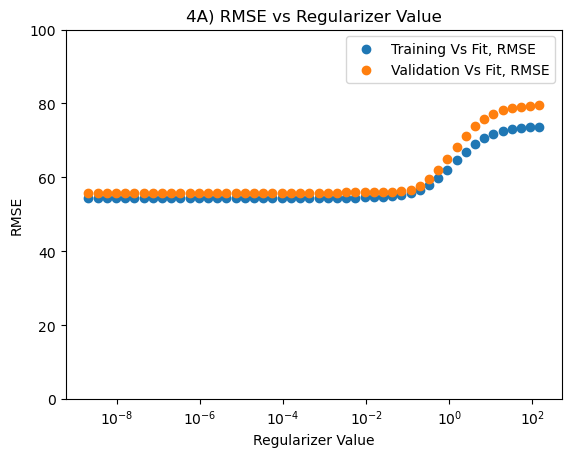

Best Regularizer:  2.061153622438558e-09
RMS for testing data:  52.381998657099075
C/D) 
0
1
2
3
4


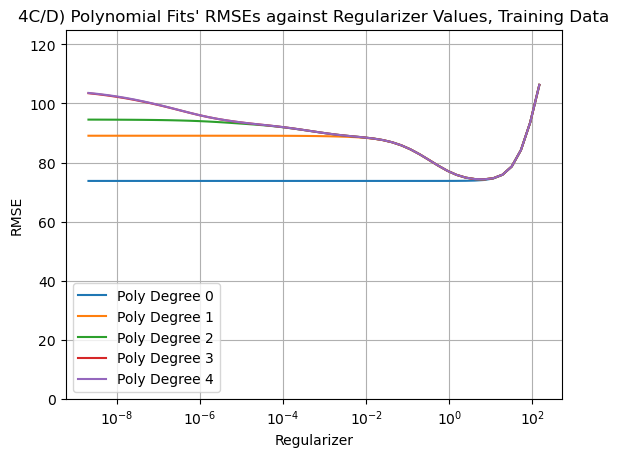

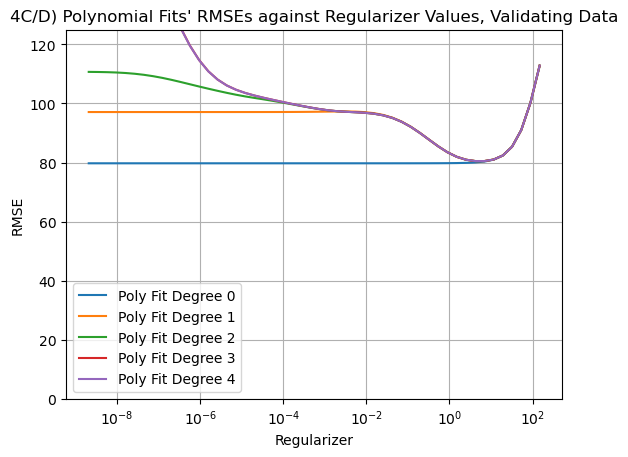

In [4]:
# Student ID: 20838709

import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

def rms_between_arrays(array1, array2):
    squared_diff = (array1 - array2) ** 2
    mean_squared_diff = np.mean(squared_diff)
    rms = np.sqrt(mean_squared_diff)

    return rms

def get_regularized_inv(train_x_matrix, regularizer):
    
    comp1 = np.transpose(train_x_matrix) * train_x_matrix
    comp2 = comp1 + regularizer * np.identity(comp1.shape[0])
    comp2 = np.linalg.pinv(comp2)
    regularized_inv = comp2 * np.transpose(train_x_matrix)
    
    return regularized_inv

diabetes = datasets.load_diabetes()

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    diabetes.data, diabetes.target, test_size=0.3333, shuffle=True,
)

X_validate, X_train, Y_validate, Y_train = sklearn.model_selection.train_test_split(
    X_train, Y_train, test_size=0.5, shuffle=True,
)

lambds = np.exp(np.linspace(-20,5,50))

# A)
print("A) ")

training_rmses = []
validation_rmses = []

for regularizer in lambds:
    reg = sklearn.linear_model.Ridge(alpha = regularizer)
    
    reg.fit(X_train, Y_train)
    
    training_predictions = reg.predict(X_train)
    validation_predictions = reg.predict(X_validate)
    
    rms_train = rms_between_arrays(training_predictions, Y_train)
    rms_validation = rms_between_arrays(validation_predictions, Y_validate)
 
    training_rmses.append(rms_train)
    validation_rmses.append(rms_validation)

plt.xscale('log')
plt.scatter(lambds, training_rmses, label="Training Vs Fit, RMSE")
plt.scatter(lambds, validation_rmses, label="Validation Vs Fit, RMSE")

plt.xlabel("Regularizer Value")
plt.ylabel("RMSE")
plt.title("4A) RMSE vs Regularizer Value")
plt.ylim(0, 100)
plt.legend()
plt.show()

best_regularizer = lambds[validation_rmses.index(min(validation_rmses))]
print("Best Regularizer: ", best_regularizer)

reg = sklearn.linear_model.Ridge(alpha = best_regularizer)

reg.fit(X_train, Y_train)

testing_predictions = training_predictions = reg.predict(X_test)
rms_test = rms_between_arrays(testing_predictions, Y_test)

print("RMS for testing data: ", rms_test)


#B

# Running the code multiple times yields RMSE curves that vary 10-20% along the whole curve.
# However, the general shape of the curve stays the same from trial to trail.
# In most trials, the RMSE for both training and testing is only increasing with the regularizer.
# Overfitting would suggest that the regression has a much lower RMSE with the training data
# than it does with the testing data, but the RMSE for all regularizer values is not observed
# To be consistently higher for the training data than it is for the testing data.

# Even though the vertical offset of the RMSE for the training and validating 
# Changes from trial to trial, the best regularizer only moves around a little bit.

# C/D)
print("C/D) ")

training_rmses_per_deg = []
validating_rmses_per_deg = []
max_deg = 5

for poly_deg in range(0, max_deg):
    training_rmses = []
    validating_rmses = []
    print(poly_deg)

    for regularizer in lambds:
        F = np.matrix(sklearn.preprocessing.PolynomialFeatures(degree = poly_deg).fit_transform(X_train))
        regularized_inv = get_regularized_inv(F, regularizer)
        weights = regularized_inv * np.transpose(np.matrix(Y_train))
                
        regressed_training = np.array(weights.T * F.T)
        rms_polys_against_training = rms_between_arrays(regressed_training.T, Y_train)
        
        F_validate = np.matrix(sklearn.preprocessing.PolynomialFeatures(degree = poly_deg).fit_transform(X_validate))
        regressed_validating = np.array(weights.T * F_validate.T)
        rms_polys_against_validating = rms_between_arrays(regressed_validating.T, Y_validate)
         
        training_rmses.append(rms_polys_against_training)
        validating_rmses.append(rms_polys_against_validating)

    training_rmses_per_deg.append(training_rmses)
    validating_rmses_per_deg.append(validating_rmses)
    
for poly_deg in range(0, max_deg):
    plt.plot(lambds, training_rmses_per_deg[poly_deg], label="Poly Degree " + str(poly_deg))
    
plt.ylim(0, 125)
plt.xscale('log')
plt.xlabel("Regularizer")
plt.ylabel("RMSE")
plt.title("4C/D) Polynomial Fits' RMSEs against Regularizer Values, Training Data")    
plt.legend()
plt.grid()
plt.show()

for poly_deg in range(0, max_deg):
    plt.plot(lambds, validating_rmses_per_deg[poly_deg], label="Poly Fit Degree " + str(poly_deg))
    
plt.ylim(0, 125)
plt.xscale('log')
plt.xlabel("Regularizer")
plt.ylabel("RMSE")
plt.title("4C/D) Polynomial Fits' RMSEs against Regularizer Values, Validating Data")    
plt.legend()
plt.grid()
plt.show()



# My laptop can barely handle polynomials of degree 4, so I'll have to hypothesize
# That the trend observed from polynomials 1 - 4 will continue onwards to polynomials
# Of higher degrees. 


We use the regression system using exactly the same functions as the Perceptron.  Here we train it using `X` and `Y`, and then determine what the outputs are given `X`.

In [ ]:
reg.fit(X, Y)
output = reg.predict(X)

For data, we are going to use the Diabetes dataset from https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html which is also built in to `sklearn`.  You can load this data set using

In [24]:
diabetes = sklearn.datasets.load_diabetes()

As with the digits dataset, you can access the `X` values with `diabetes.data` and the `Y` values with `diabetes.target`.  See https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset for an explanation of what the different data values mean.

**a) [1 mark]** Split the data evenly into three parts: 1/3rd training, 1/3rd validation, and 1/3rd testing.  This will involve calling `sklearn.model_selection.train_test_split` twice.  Train the model using various different amounts of regularization from $e^{-20)$ to $e^5$ (`lambds = np.exp(np.linspace(-20,5,50))`).  Compute the Root Mean Squared Error on the training and validation datasets and plot how this error changes for different amounts of regularization.  Using these results, pick a good value for regularization and then apply this to your testing data.  Report the Root Mean Squared Error for the testing data.

**b) [1 mark]** How consistent is this result?  That is, if you redo part a) but with a different randomly chosen split in the data, do you get the same results?  What overall pattern do you see?  Do the results show signs of overfitting?  Would you expect overfitting here?  Why or why not?

**c) [1 mark]** Now let's try regression using polynomials as our features.  Again, `sklearn` has a tool to convert our `X` data into a version with all the polynomials calculated.  Note that our `X` data has 10 inputs ($x_1; x_2; x_3; ... x_{10}$) so when converted to polynomials up to degree 2 it will include $x_1^2, x_1x_2, x_1x_3, ... x_2^2, x_2x_3$, and so on.  Here is how you convert the raw input data into the features `F` that you can then use instead of `X`:

In [25]:
F = sklearn.preprocessing.PolynomialFeatures(degree=2).fit_transform(diabetes.data)

Now repeat part a) using the new features.  How does this change the result?

**d) [1 mark]** Increase the degree of polynomials used.  Try values up to at least 5.  Compute the same plots as in part a).  How does this change the plots?  Why does this happen?  What happens if you increase the degree up to even larger values like 10 or 20?  Why?